In [65]:
import pandas as pd

df = pd.read_csv(
    "../data/cleaned_data_one/cleaned_data_with_feature_engineering/cleaned_data_2.csv"
)

In [66]:
df.head()

,Unnamed: 0,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,SymptomCourse,TreatmentPresence,Binary_med,...,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,COPE_Inventory_Active_Coping_Total,COPE_Inventory_Planning_Total,COPE_Inventory_Total,Brief_Experiential_Avoidance_Questionnaire_Total
0,0,2,1,23.0,4,1,1,4,1,2,...,0.0,8.0,6.0,4.0,3.0,5.0,15.0,16.0,31.0,31.0
1,1,3,1,22.0,4,1,1,2,1,2,...,1.0,2.0,5.0,1.0,1.0,5.0,14.0,16.0,30.0,45.0
2,2,4,1,21.0,4,1,1,2,1,1,...,0.0,3.0,2.0,0.0,6.0,9.0,9.0,6.0,15.0,83.0
3,3,5,1,18.0,4,1,1,4,1,1,...,2.0,9.0,4.0,11.0,12.0,7.0,10.0,12.0,22.0,77.0
4,4,6,1,19.0,4,2,1,3,1,1,...,4.0,1.0,3.0,0.0,12.0,2.0,8.0,6.0,14.0,87.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        81 non-null     int64  
 1   P_Num                                             81 non-null     int64  
 2   Gender                                            81 non-null     int64  
 3   Age                                               81 non-null     float64
 4   Ethnicity                                         81 non-null     int64  
 5   Education                                         81 non-null     int64  
 6   OCD_selfReport                                    81 non-null     int64  
 7   SymptomCourse                                     81 non-null     int64  
 8   TreatmentPresence                                 81 non-null     int64  
 9   Binary_med             

In [68]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df["HADS_ANX_Scale_Total"]

0      8.0
1     15.0
2     19.0
3     18.0
4     17.0
      ... 
76    12.0
77    13.0
78    11.0
79    15.0
80    15.0
Name: HADS_ANX_Scale_Total, Length: 81, dtype: float64

In [71]:
df["HADS_ANX_Scale_Total"].min()

np.float64(3.0)

In [72]:
df["HADS_DEP_Scale_Total"]

0      2.0
1      2.0
2     13.0
3     11.0
4     15.0
      ... 
76     8.0
77    10.0
78     9.0
79    13.0
80    15.0
Name: HADS_DEP_Scale_Total, Length: 81, dtype: float64

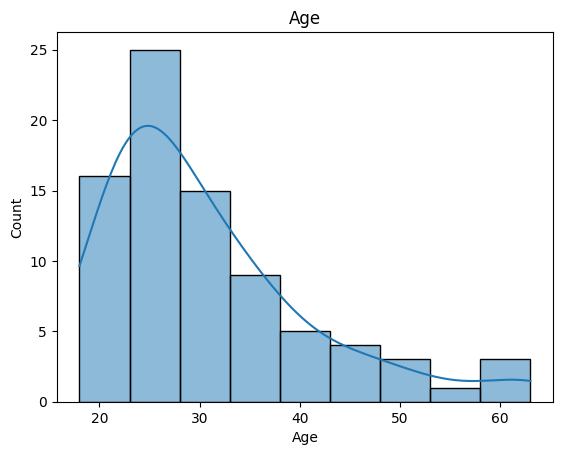

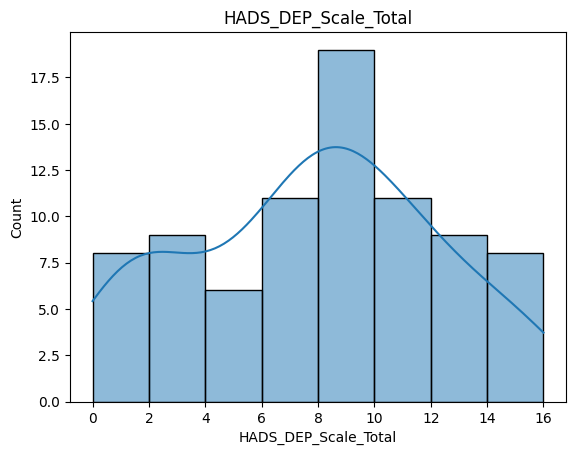

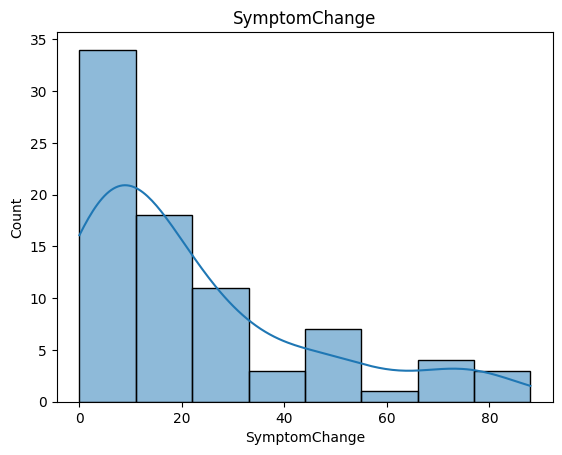

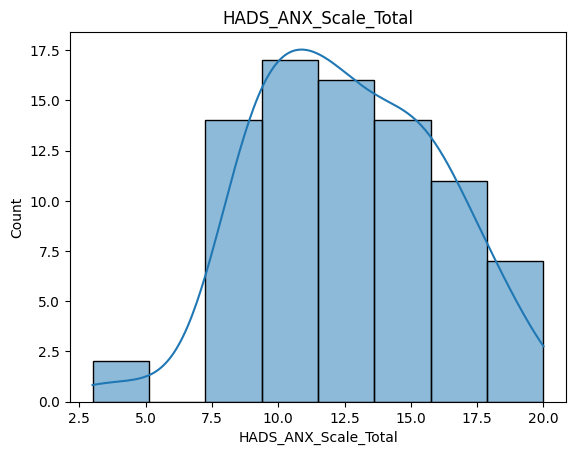

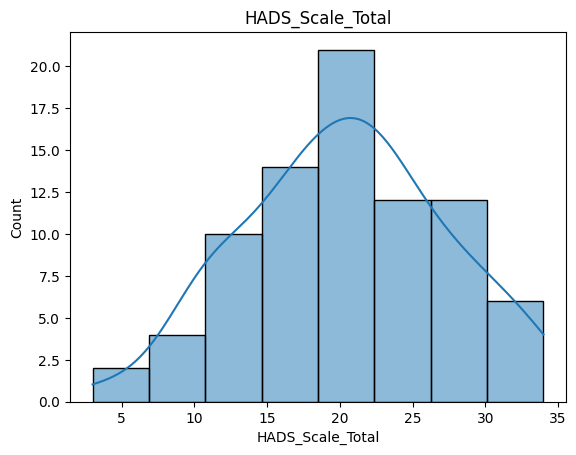

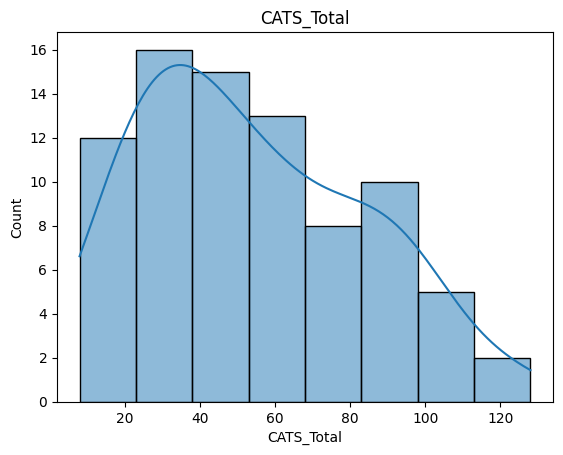

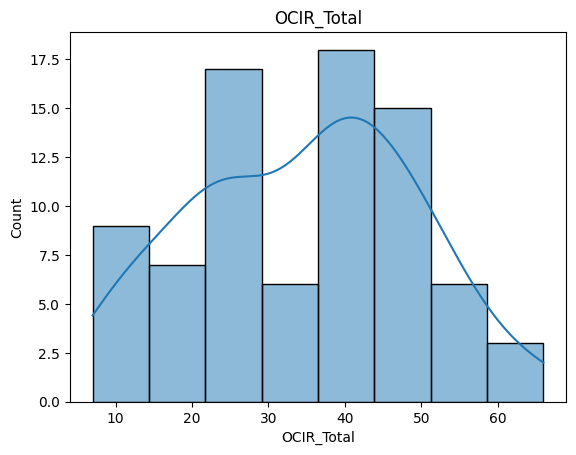

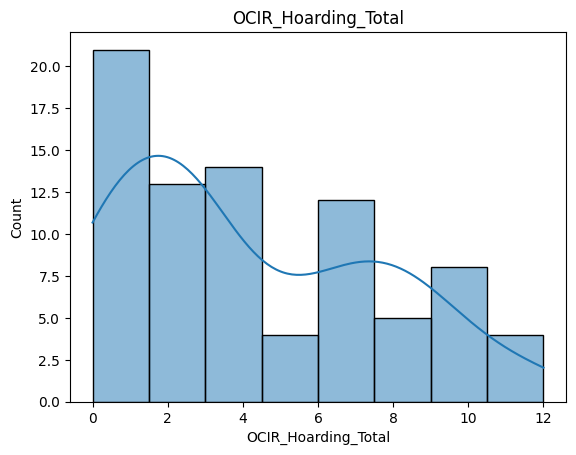

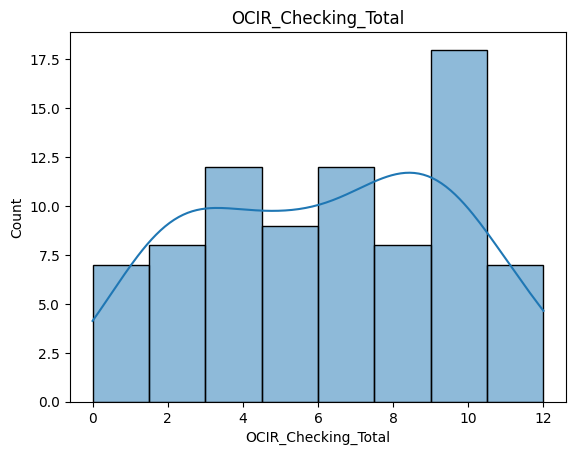

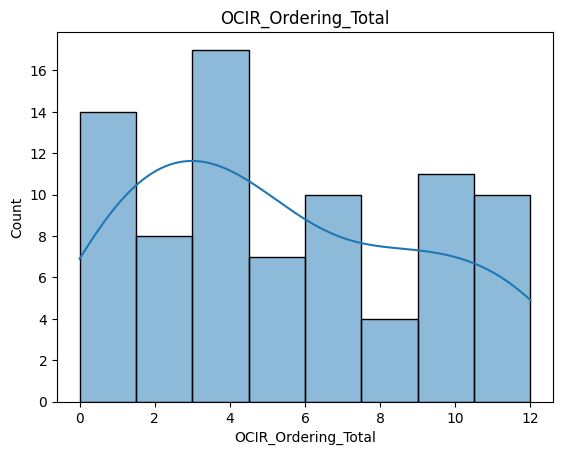

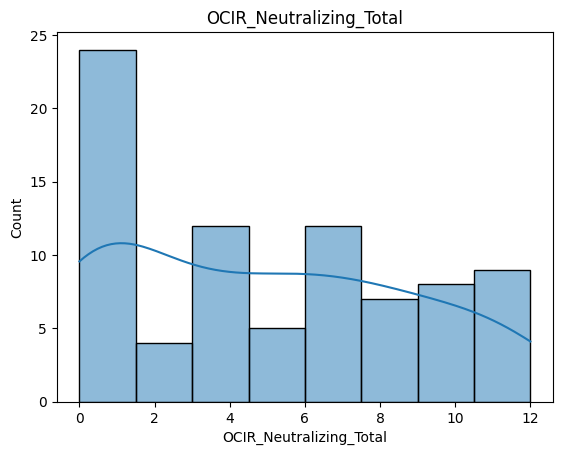

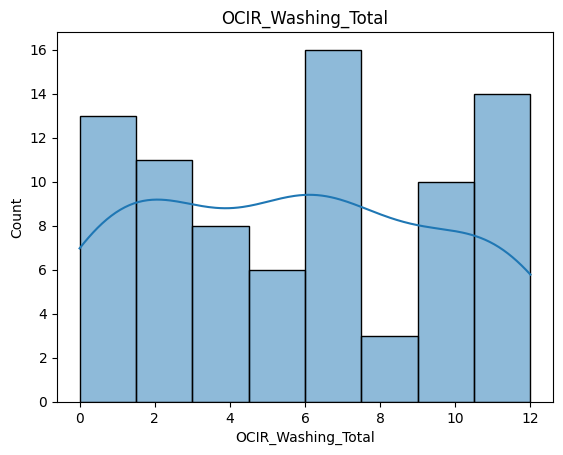

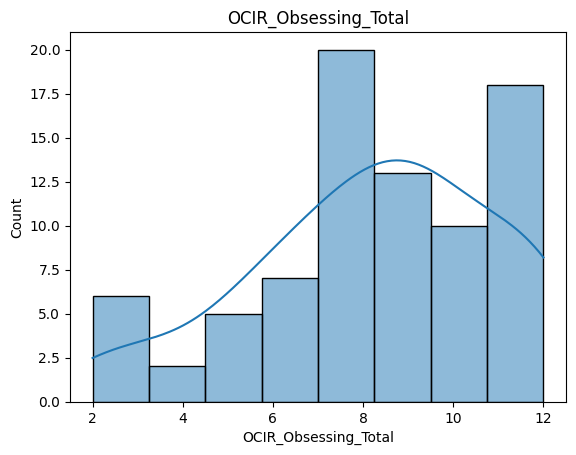

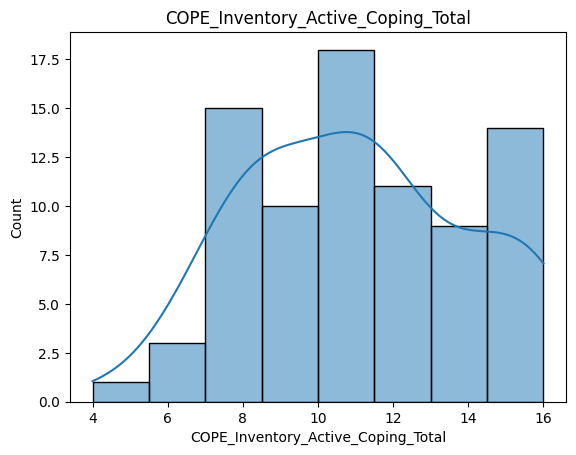

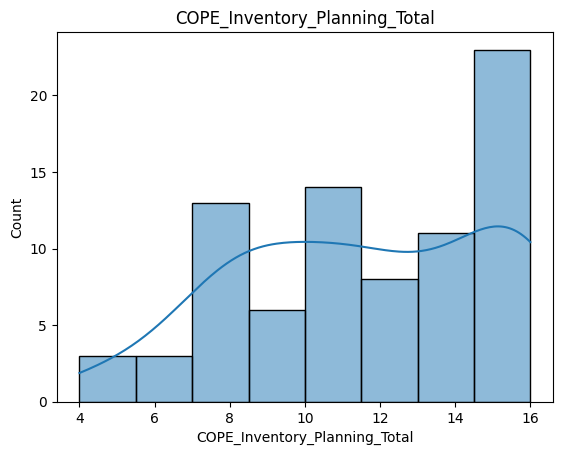

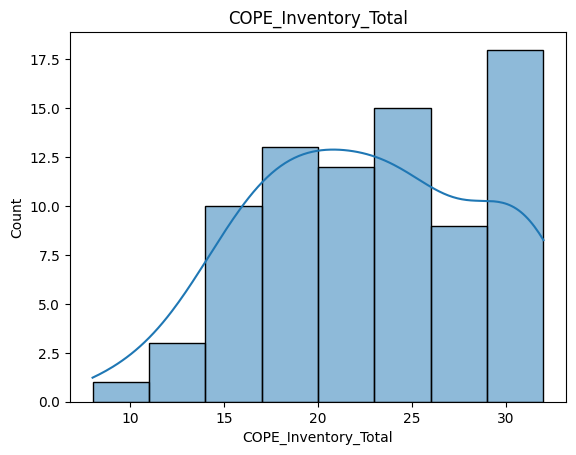

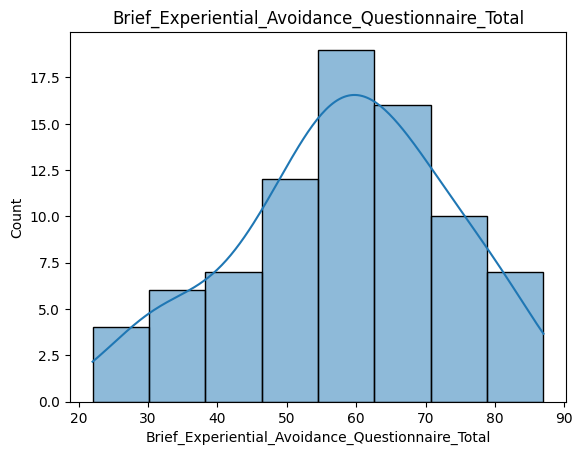

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    "Age",
    "HADS_DEP_Scale_Total",
    "SymptomChange",
    "HADS_ANX_Scale_Total",
    "HADS_Scale_Total",
    "CATS_Total",
    "OCIR_Total",
    "OCIR_Hoarding_Total",
    "OCIR_Checking_Total",
    "OCIR_Ordering_Total",
    "OCIR_Neutralizing_Total",
    "OCIR_Washing_Total",
    "OCIR_Obsessing_Total",
    "COPE_Inventory_Active_Coping_Total",
    "COPE_Inventory_Planning_Total",
    "COPE_Inventory_Total",
    "Brief_Experiential_Avoidance_Questionnaire_Total",
]

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

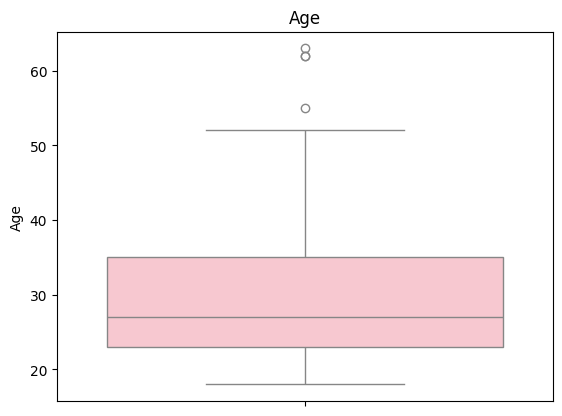

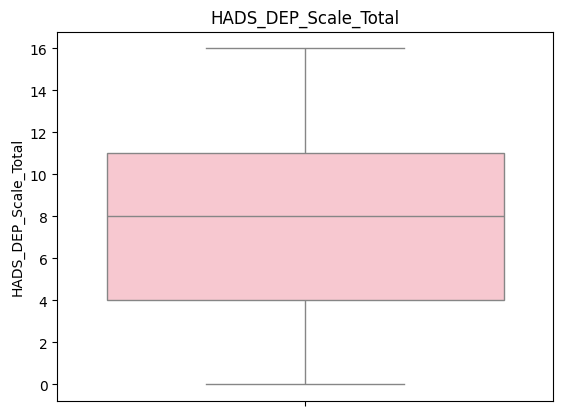

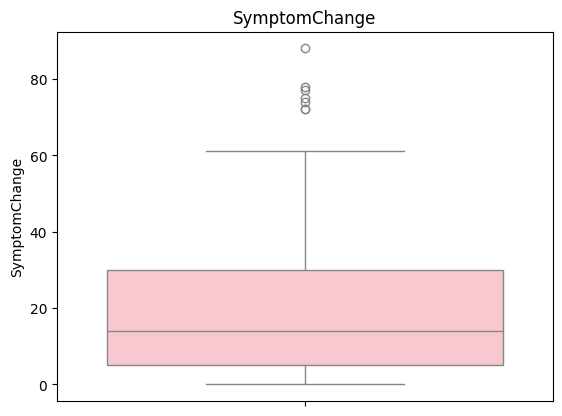

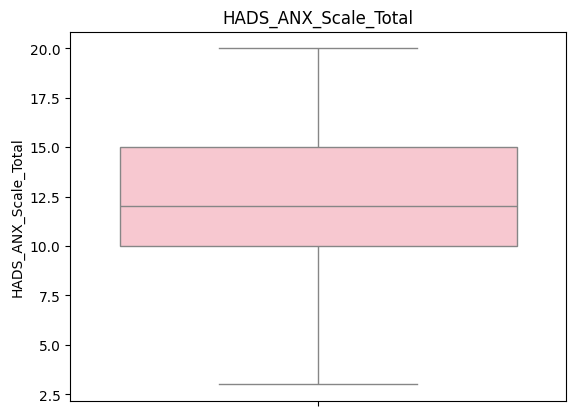

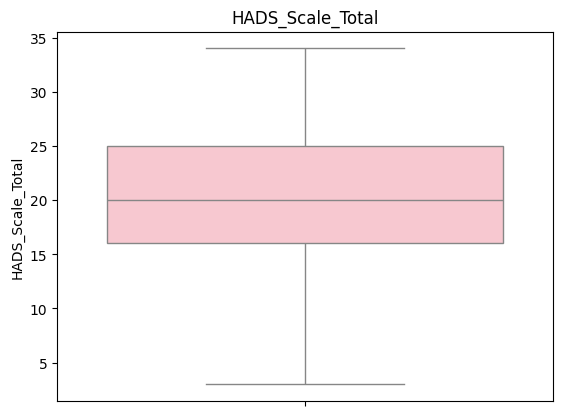

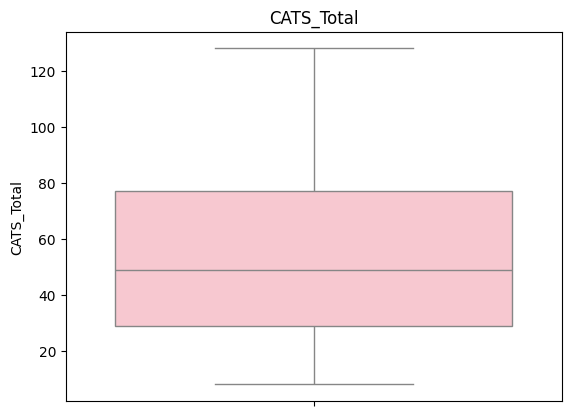

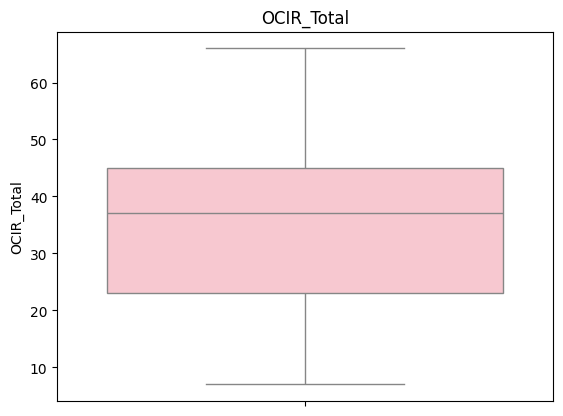

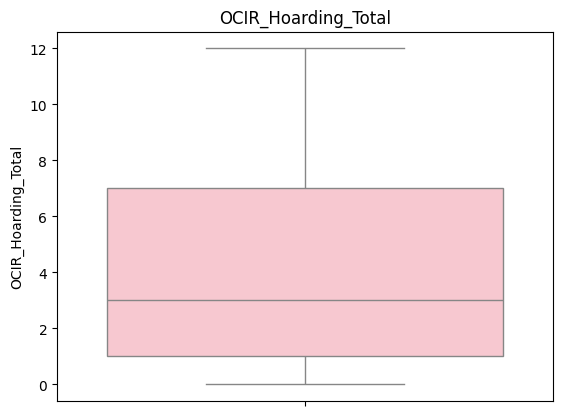

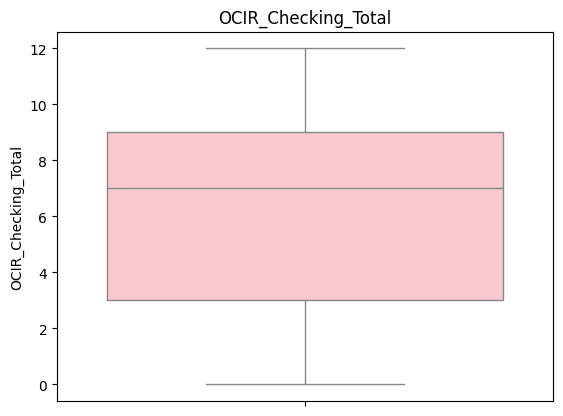

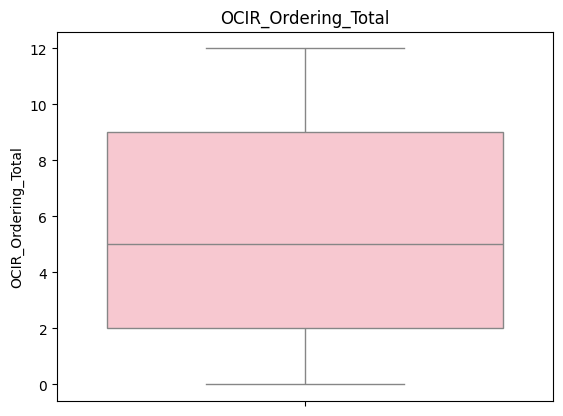

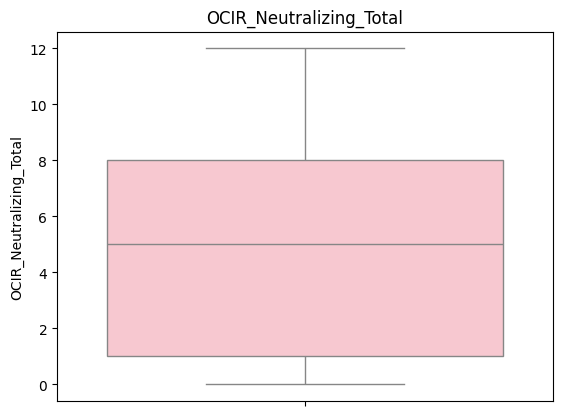

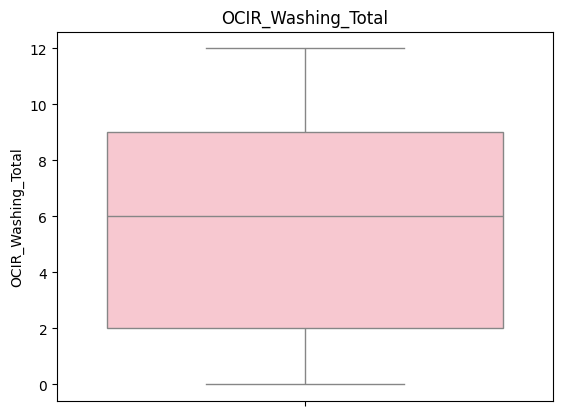

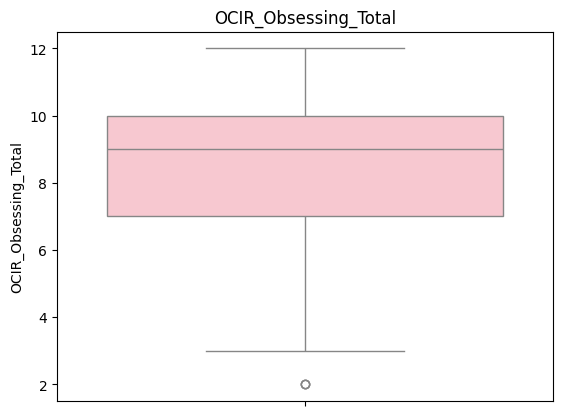

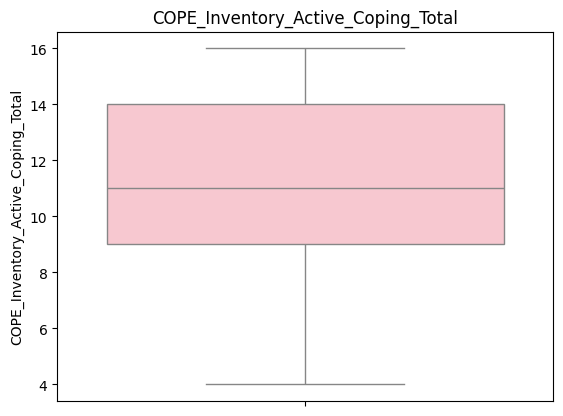

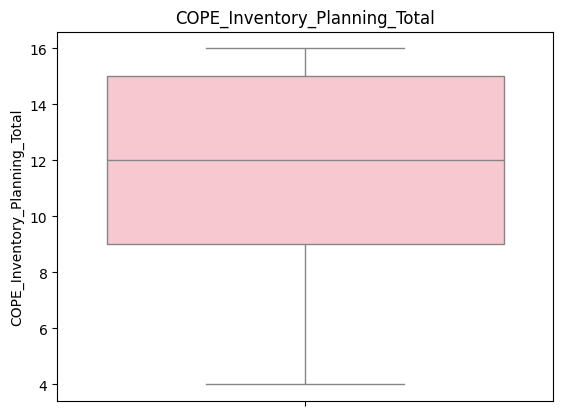

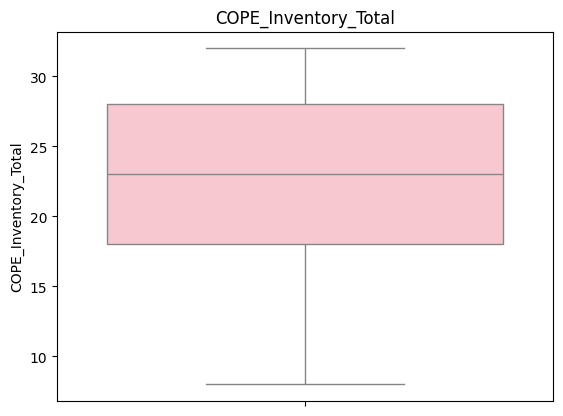

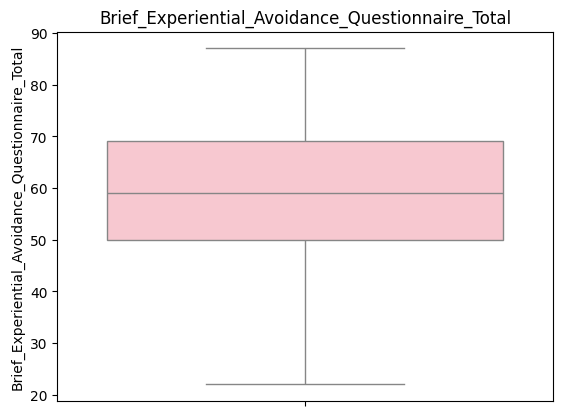

In [74]:
for col in numeric_cols:
    sns.boxplot(df[col], color="pink")
    plt.title(col)
    plt.ylabel(col)
    plt.show()

In [75]:
df[
    "OCIR_Obsessing_Total"
].min()  # though 2 is too low it is a valid answer in the scale

np.float64(2.0)

In [76]:
df["SymptomChange"].max()

np.float64(88.0)

considering 8 as a cutoff, in both the HADS depression and anxiety subscale, people with anxiety are more than people with depression, more than 50% (around 75%)shows total anxiety scale of 8 and above whereas for depression scale only around 50% is above 8 (8 being the median)

In [77]:
df["Brief_Experiential_Avoidance_Questionnaire_Total"].corr(df["OCIR_Total"])

np.float64(0.31412181192752825)

In [78]:
df["OCIR_Total"].corr(df["HADS_DEP_Scale_Total"])

np.float64(0.4533392998795951)

In [79]:
df["OCIR_Total"].corr(df["HADS_ANX_Scale_Total"])

np.float64(0.3847118536789493)

In [80]:
correlation_AB = df["Brief_Experiential_Avoidance_Questionnaire_Total"].corr(
    df["HADS_DEP_Scale_Total"]
)
print(correlation_AB)

0.5828573576976182


there is a 0.58 correlation between the the HADS_depression_scale_Total and the Brief_Experiential_Avoidance scale

In [81]:
categorical_variables = [
    "Ethnicity",
    "Gender",
    "Education",
    "OCD_selfReport",
    "SymptomCourse",
    "TreatmentPresence",
    "Binary_med",
    "Bin_Therapy",
    "Bin_otherTreat",
    "depression_diagnosis_type",
    "anxiety_diagnosis_type",
]

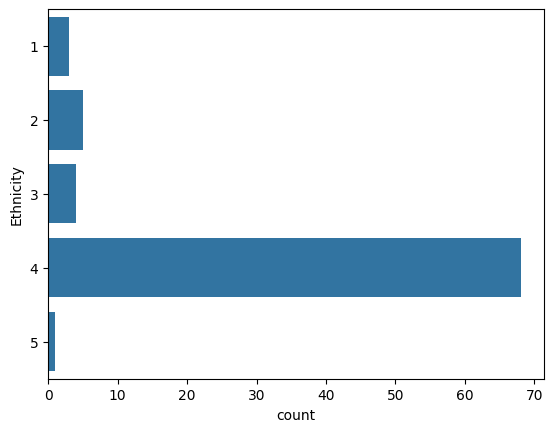

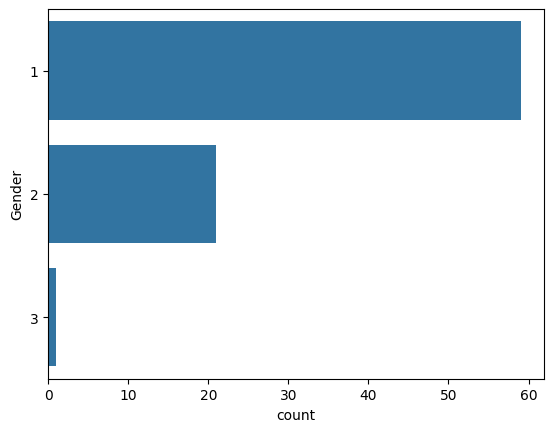

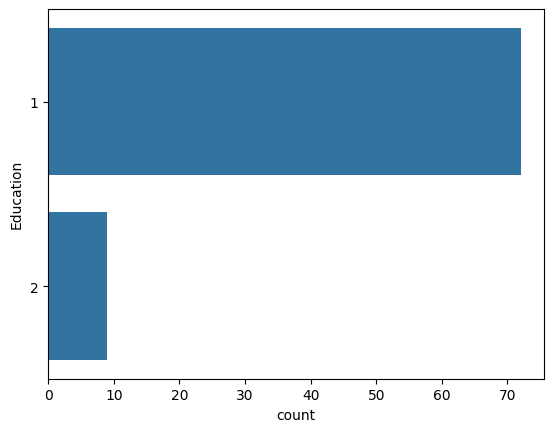

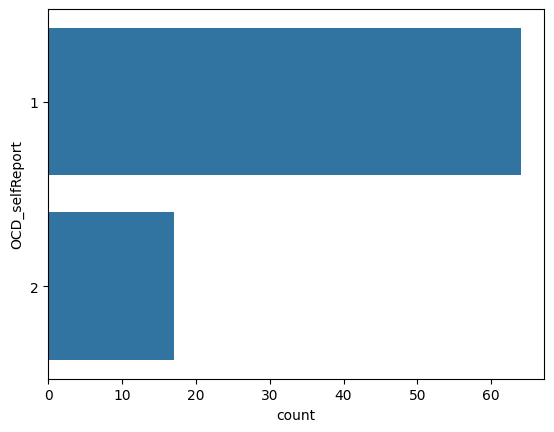

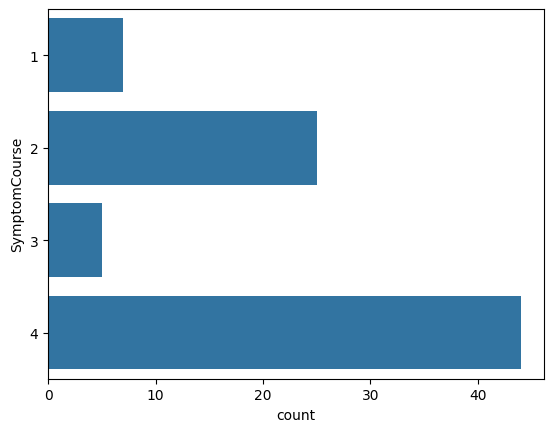

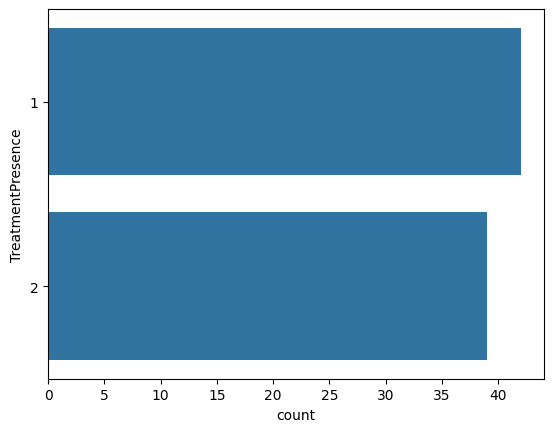

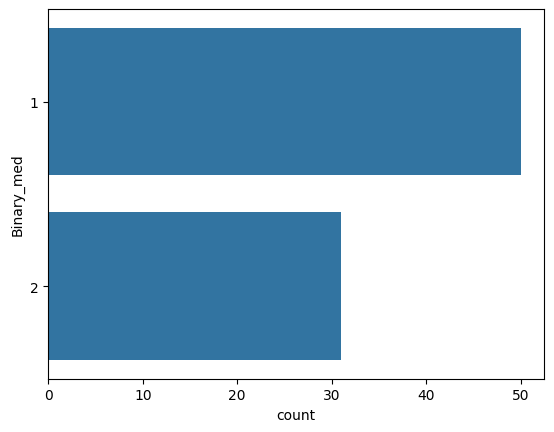

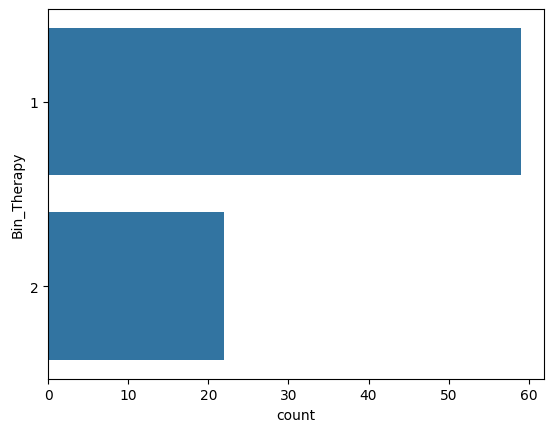

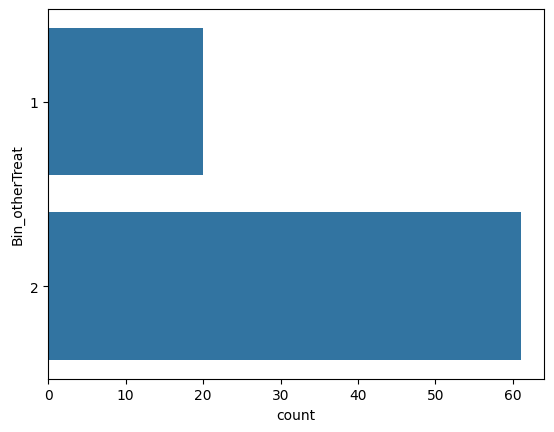

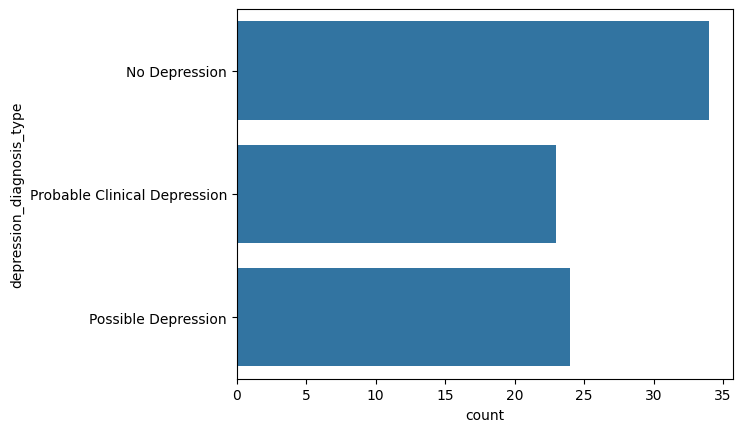

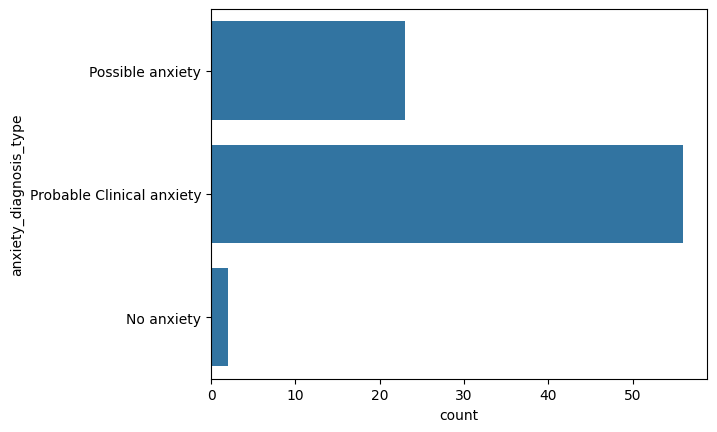

In [82]:
for col in categorical_variables:
    sns.countplot(y=col, data=df)
    plt.show()

treatment presence, all individuals received a sort of treatment related to OCD, and people with NO Depression are significantly higher than people with no anxiety(only 2),also people with probable clinical anxiety(the worse type) are more than people who has probable clinical depression and are the highest among all anxiety levels categories

In [83]:
def comorbidity_type(row):
    if (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "Probable Clinical Depression"
    ):
        return "probable clinical anxiety and probable clinical depression"
    elif (row["anxiety_diagnosis_type"] == "Possible anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "possible anxiety and possible depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):  # No anxiety
        return "no anxiety or depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "Probable Clinical Depression"
    ):
        return "no anxiety but probable clinical depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "no anxiety but possible depression"
    elif (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):
        return "probable clinical anxiety but no depression"
    elif (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "probable clinical anxiety and possible depression"
    elif (row["anxiety_diagnosis_type"] == "Possible anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):
        return "possible anxiety but no depression"
    else:  # (row['anxiety_diagnosis_type']== 'Possible anxiety') and (row['depression_diagnosis_type']=='Probable Clinical Depression'):
        return "possible anxiety and probable clinical depression"


df["comorbidity_type"] = df.apply(comorbidity_type, axis=1)  ##

In [84]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,SymptomCourse,TreatmentPresence,Binary_med,Bin_Therapy,...,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,COPE_Inventory_Active_Coping_Total,COPE_Inventory_Planning_Total,COPE_Inventory_Total,Brief_Experiential_Avoidance_Questionnaire_Total,comorbidity_type
0,2,1,23.0,4,1,1,4,1,2,1,...,8.0,6.0,4.0,3.0,5.0,15.0,16.0,31.0,31.0,possible anxiety but no depression
1,3,1,22.0,4,1,1,2,1,2,1,...,2.0,5.0,1.0,1.0,5.0,14.0,16.0,30.0,45.0,probable clinical anxiety but no depression
2,4,1,21.0,4,1,1,2,1,1,1,...,3.0,2.0,0.0,6.0,9.0,9.0,6.0,15.0,83.0,probable clinical anxiety and probable clinica...
3,5,1,18.0,4,1,1,4,1,1,1,...,9.0,4.0,11.0,12.0,7.0,10.0,12.0,22.0,77.0,probable clinical anxiety and probable clinica...
4,6,1,19.0,4,2,1,3,1,1,1,...,1.0,3.0,0.0,12.0,2.0,8.0,6.0,14.0,87.0,probable clinical anxiety and probable clinica...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,321,1,31.0,4,1,1,4,2,2,1,...,6.0,11.0,7.0,6.0,9.0,10.0,11.0,21.0,70.0,probable clinical anxiety and possible depression
77,324,1,32.0,2,1,1,3,1,1,1,...,11.0,12.0,10.0,10.0,11.0,6.0,5.0,11.0,30.0,probable clinical anxiety and possible depression
78,339,1,24.0,2,1,2,1,2,2,2,...,7.0,10.0,11.0,8.0,4.0,9.0,14.0,23.0,60.0,probable clinical anxiety and possible depression
79,366,1,27.0,2,1,2,4,2,2,1,...,10.0,9.0,6.0,7.0,10.0,16.0,16.0,32.0,81.0,probable clinical anxiety and probable clinica...


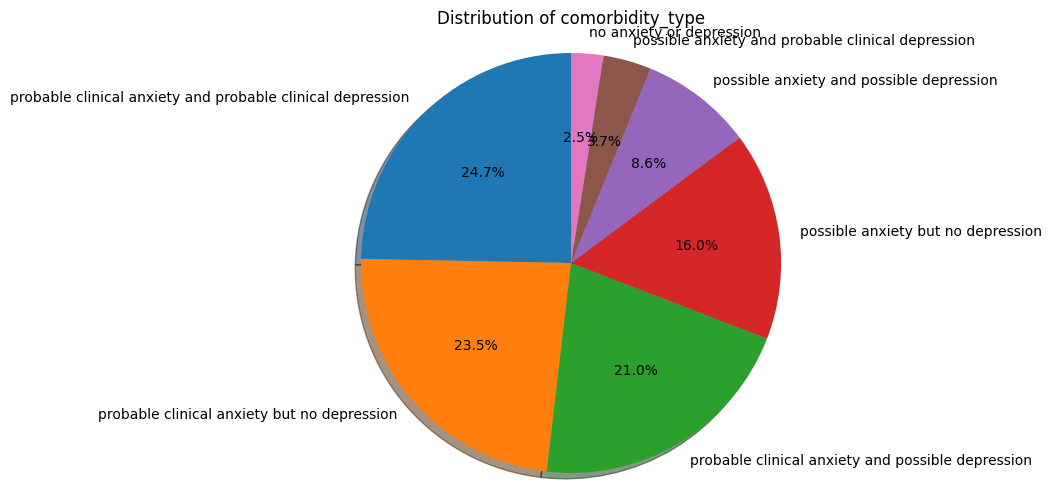

In [85]:
sizes = df["comorbidity_type"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of comorbidity_type")  # Optional: Add a title
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

1. only 2.5% patients with no anxiety or depression
2. most individuals (around 25%)showed probable anxiety and probable depression(worst case)
3. around 28 percent showed probable clinical depression and around 69% showed probable clinical anxiety 
4. depression (probable or possible) never came with No anxiety symptoms
(out of 81 individuals who have had or have OCD and were exposed to at least a treatment that partly focused to OCD, according to the answers)

In [86]:
no_anx_dep = df[df["comorbidity_type"] == "no anxiety or depression"]

In [87]:
possible_anx_prob_dep = df[
    df["comorbidity_type"] == "possible anxiety and probable clinical depression"
]

In [88]:
possible_anx_dep = df[
    df["comorbidity_type"] == "possible anxiety and possible depression"
]

In [89]:
possible_anx_no_dep = df[df["comorbidity_type"] == "possible anxiety but no depression"]

In [90]:
prob_anx_possible_depression = df[
    df["comorbidity_type"] == "probable clinical anxiety and possible depression"
]

In [91]:
prob_anx_no_dep = df[
    df["comorbidity_type"] == "probable clinical anxiety but no depression"
]

In [92]:
prob_anx_prob_dep = [
    df["comorbidity_type"]
    == "probable clinical anxiety and probable clinical depression"
]

In [93]:
def comorbidity_type_summarized(row):
    if (row["HADS_ANX_Scale_Total"] >= 8) and (row["HADS_DEP_Scale_Total"] >= 8):
        return "anxiety and depression present"
    elif (row["HADS_ANX_Scale_Total"] >= 8) and (row["HADS_DEP_Scale_Total"] <= 7):
        return "anxiety present depression absent"
    elif (row["HADS_ANX_Scale_Total"] <= 7) and (row["HADS_DEP_Scale_Total"] >= 8):
        return "anxiety absent depression present"
    else:
        return "anxiety and depression absent"


df["comorbidity_type_summarized"] = df.apply(comorbidity_type_summarized, axis=1)

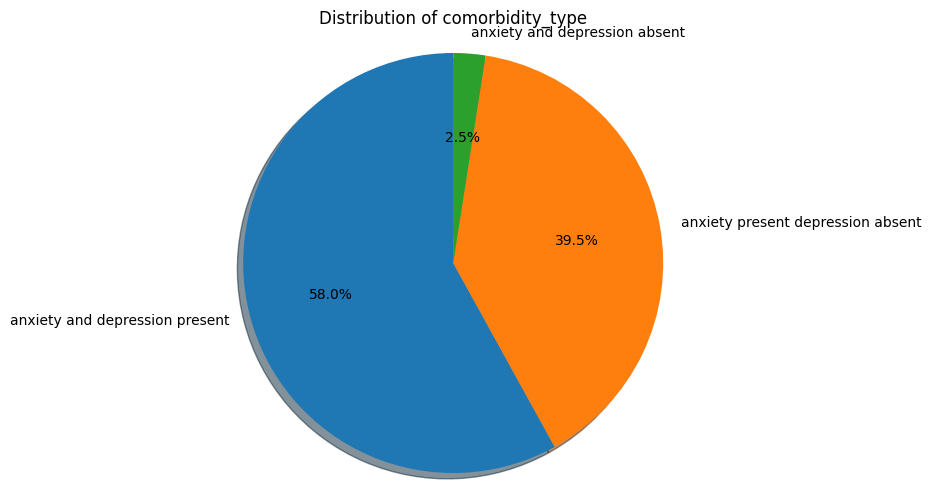

In [94]:
sizes = df["comorbidity_type_summarized"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of comorbidity_type")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

we are going to compare between these two groups. anxiety and depression present, anxiety present depression absent

In [95]:
anx_and_dep_present = df[
    df["comorbidity_type_summarized"] == "anxiety and depression present"
]

In [96]:
anx_and_dep_present["Bin_Therapy"].value_counts()

Bin_Therapy
1    30
2    17
Name: count, dtype: int64

In [97]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,SymptomCourse,TreatmentPresence,Binary_med,Bin_Therapy,...,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,COPE_Inventory_Active_Coping_Total,COPE_Inventory_Planning_Total,COPE_Inventory_Total,Brief_Experiential_Avoidance_Questionnaire_Total,comorbidity_type,comorbidity_type_summarized
0,2,1,23.0,4,1,1,4,1,2,1,...,6.0,4.0,3.0,5.0,15.0,16.0,31.0,31.0,possible anxiety but no depression,anxiety present depression absent
1,3,1,22.0,4,1,1,2,1,2,1,...,5.0,1.0,1.0,5.0,14.0,16.0,30.0,45.0,probable clinical anxiety but no depression,anxiety present depression absent
2,4,1,21.0,4,1,1,2,1,1,1,...,2.0,0.0,6.0,9.0,9.0,6.0,15.0,83.0,probable clinical anxiety and probable clinica...,anxiety and depression present
3,5,1,18.0,4,1,1,4,1,1,1,...,4.0,11.0,12.0,7.0,10.0,12.0,22.0,77.0,probable clinical anxiety and probable clinica...,anxiety and depression present
4,6,1,19.0,4,2,1,3,1,1,1,...,3.0,0.0,12.0,2.0,8.0,6.0,14.0,87.0,probable clinical anxiety and probable clinica...,anxiety and depression present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,321,1,31.0,4,1,1,4,2,2,1,...,11.0,7.0,6.0,9.0,10.0,11.0,21.0,70.0,probable clinical anxiety and possible depression,anxiety and depression present
77,324,1,32.0,2,1,1,3,1,1,1,...,12.0,10.0,10.0,11.0,6.0,5.0,11.0,30.0,probable clinical anxiety and possible depression,anxiety and depression present
78,339,1,24.0,2,1,2,1,2,2,2,...,10.0,11.0,8.0,4.0,9.0,14.0,23.0,60.0,probable clinical anxiety and possible depression,anxiety and depression present
79,366,1,27.0,2,1,2,4,2,2,1,...,9.0,6.0,7.0,10.0,16.0,16.0,32.0,81.0,probable clinical anxiety and probable clinica...,anxiety and depression present


In [98]:
anx_present_dep_absent = df[
    df["comorbidity_type_summarized"] == "anxiety present depression absent"
]

In [99]:
anx_present_dep_absent["Bin_Therapy"].value_counts()

Bin_Therapy
1    27
2     5
Name: count, dtype: int64

In [100]:
anx_and_dep_absent = df[
    df["comorbidity_type_summarized"] == "anxiety and depression absent"
]

In [101]:
anx_and_dep_absent["Bin_Therapy"].value_counts()

Bin_Therapy
1    2
Name: count, dtype: int64

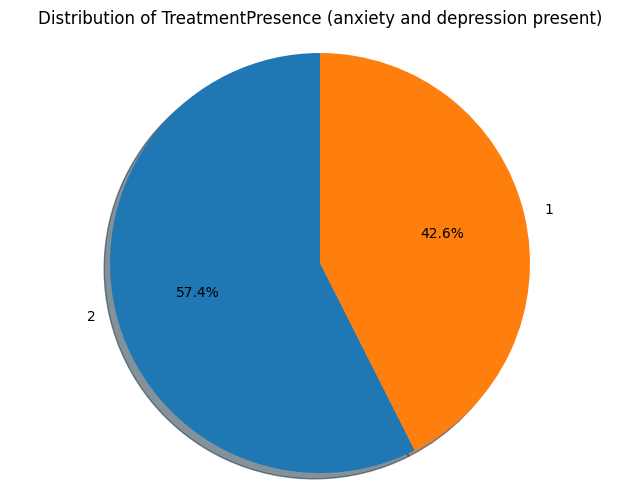

In [102]:
sizes = anx_and_dep_present["TreatmentPresence"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of TreatmentPresence (anxiety and depression present)")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

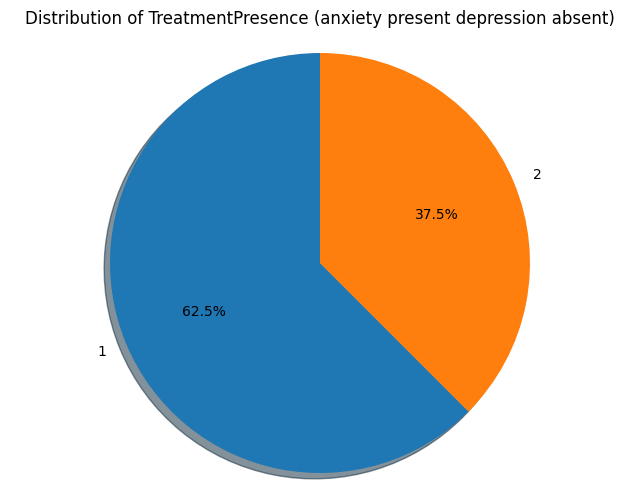

In [103]:
sizes = anx_present_dep_absent["TreatmentPresence"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of TreatmentPresence (anxiety present depression absent)")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

category one showed  (anxiety and depression present) showed more individuals ( around 57%)(more than a half) that have had treatment partially focused on OCD, whereas people with anxiety only (around 62%) said they have had treatment for OCD  


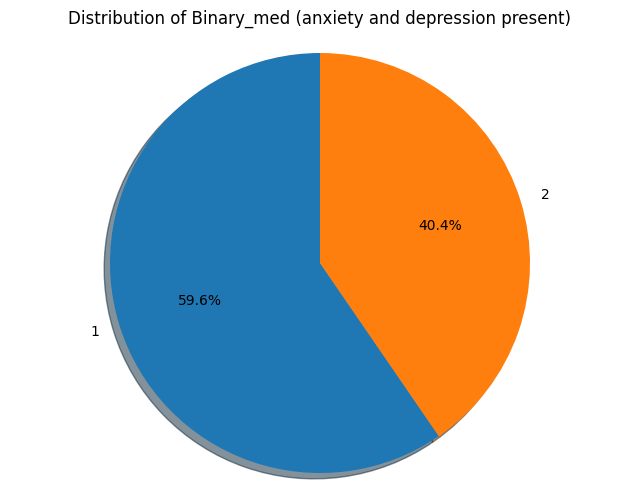

In [104]:
sizes = anx_and_dep_present["Binary_med"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title(
    "Distribution of Binary_med (anxiety and depression present)"
)  # Optional: Add a title
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

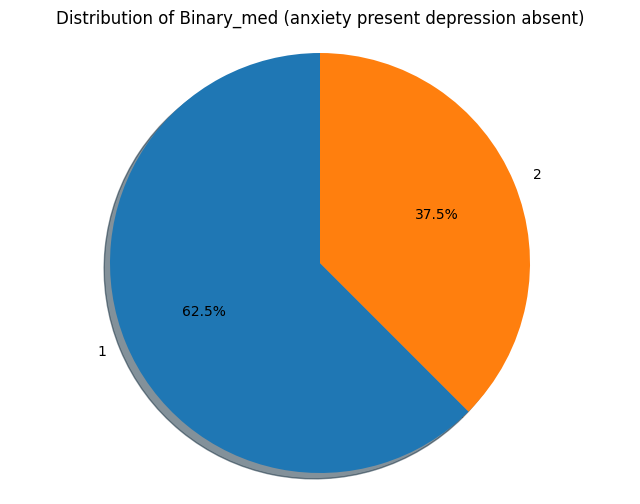

In [105]:
sizes = anx_present_dep_absent["Binary_med"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title(
    "Distribution of Binary_med (anxiety present depression absent)"
)  # Optional: Add a title
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

With consideration that both categories have different numbers of individuals, both show similar percentages of people taking and not taking medication for OCD, showing that OCD medication does not really affect depression.(according to this)

now let us compare numerical columns
starting from category one: anxiety and depression present:

In [106]:
anx_and_dep_present["Gender"].value_counts()  # 47

Gender
1    32
2    15
Name: count, dtype: int64

In [107]:
anx_present_dep_absent["Gender"].value_counts()  # 32

Gender
1    25
2     6
3     1
Name: count, dtype: int64

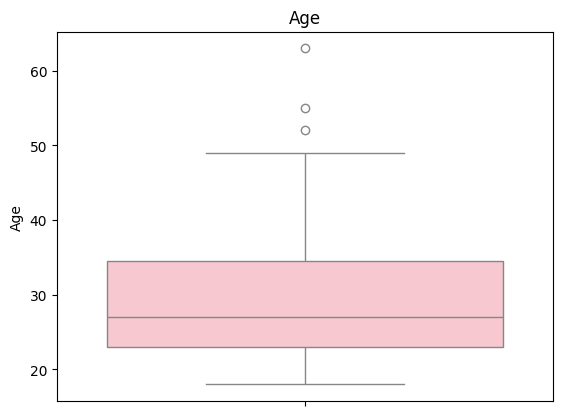

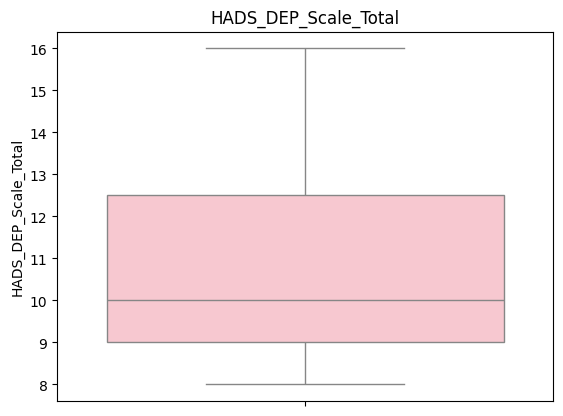

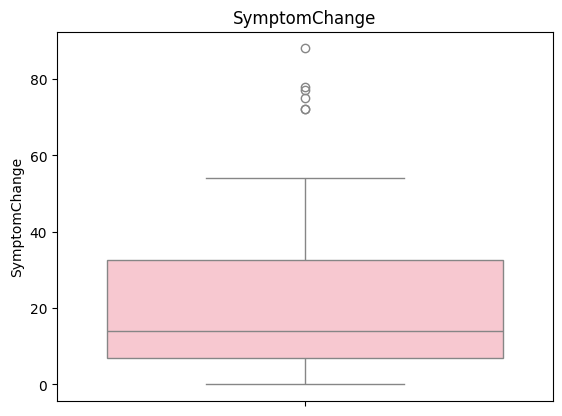

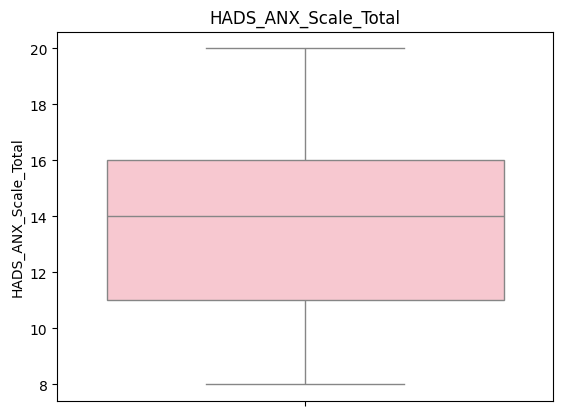

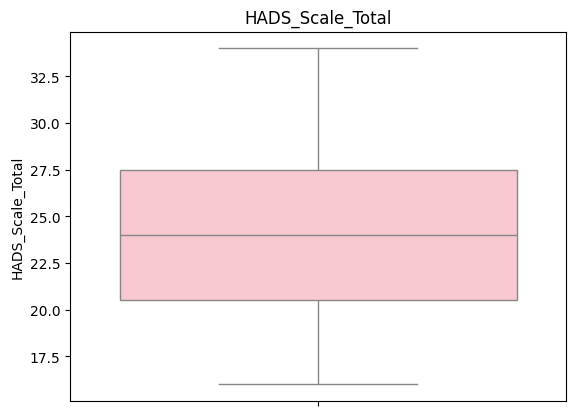

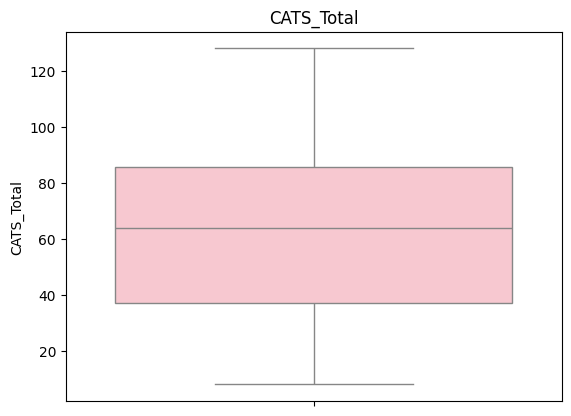

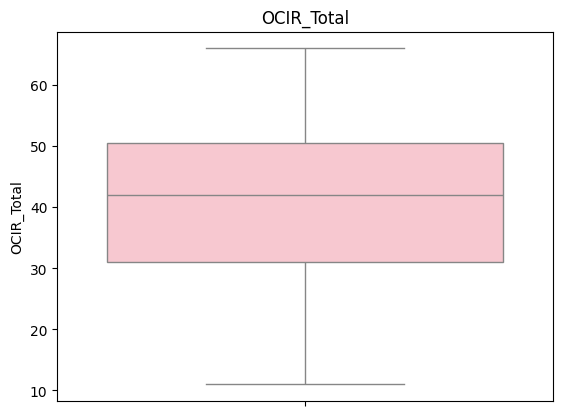

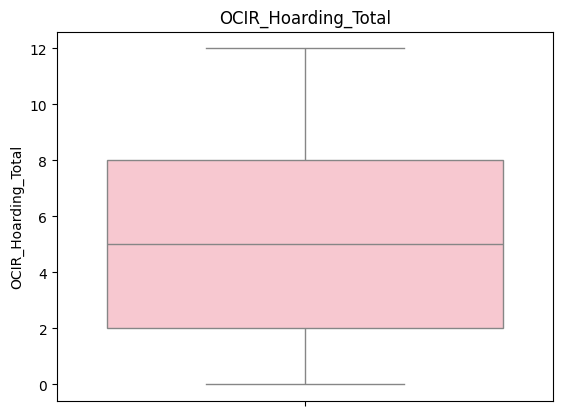

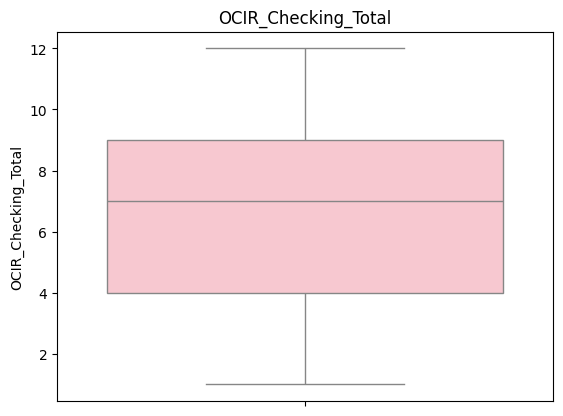

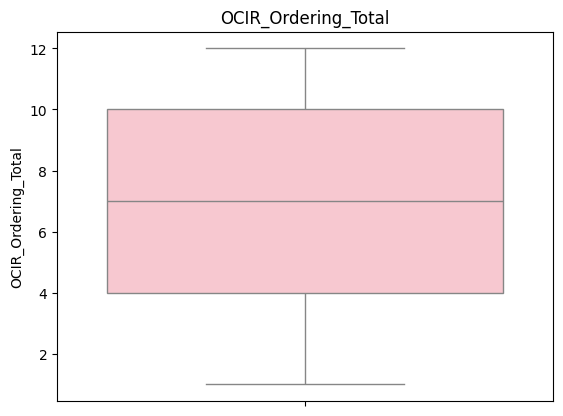

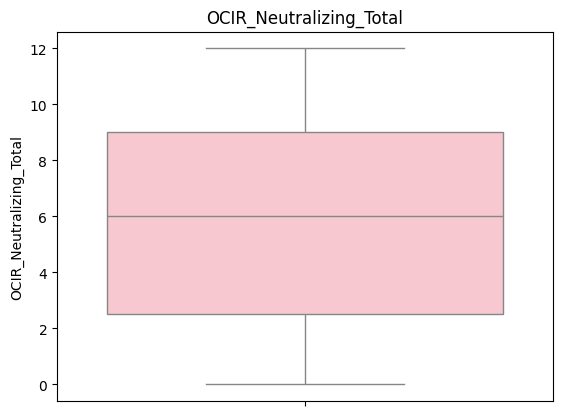

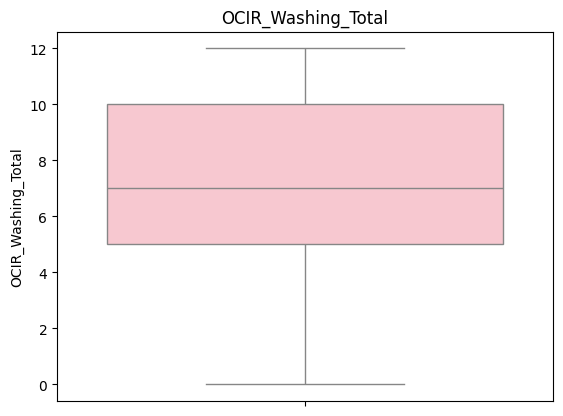

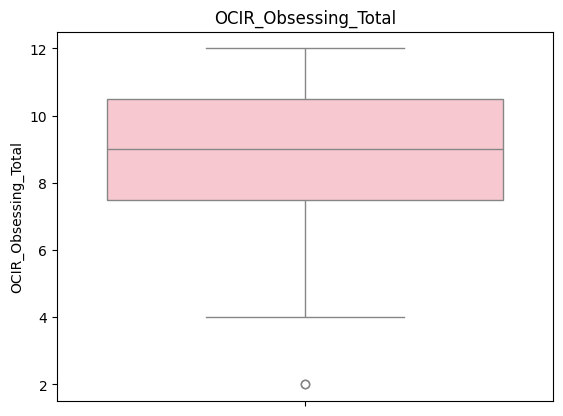

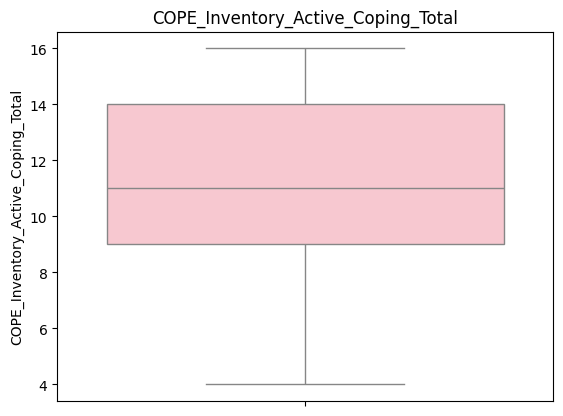

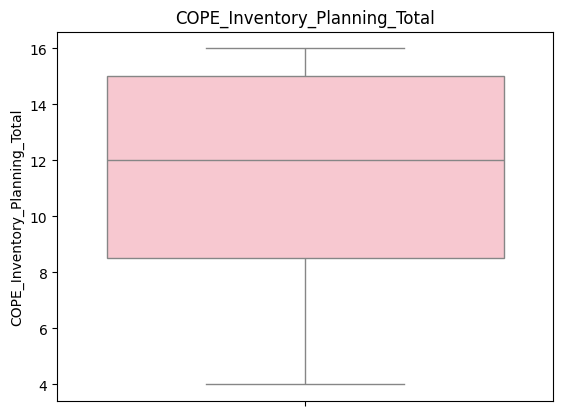

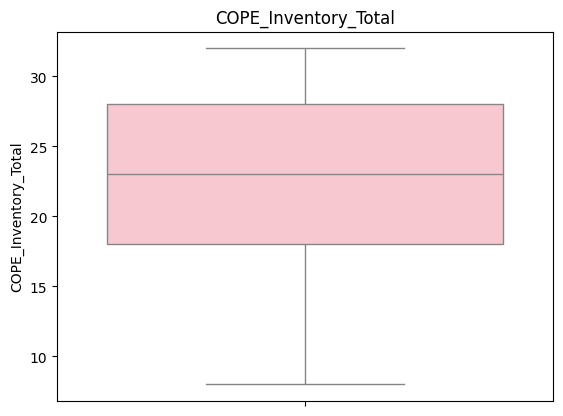

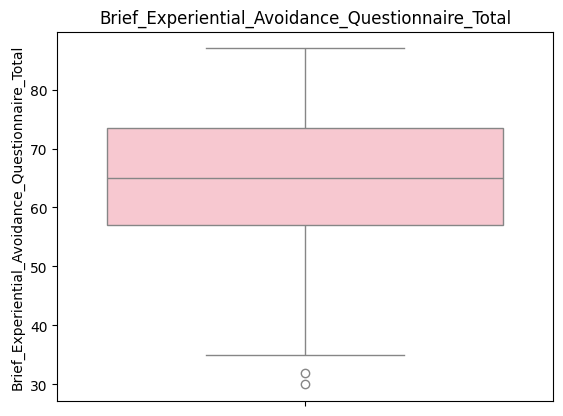

In [108]:
for col in numeric_cols:
    sns.boxplot(anx_and_dep_present[col], color="pink")
    plt.title(col)
    plt.ylabel(col)
    plt.show()

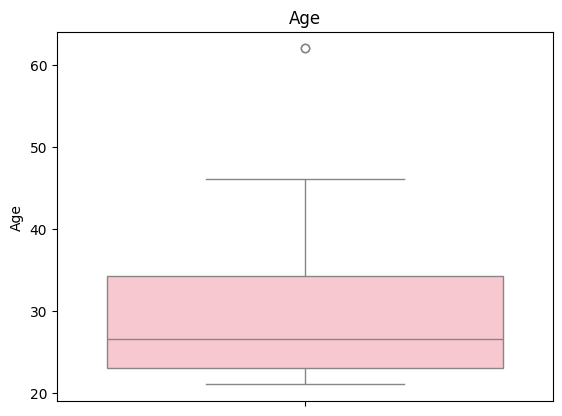

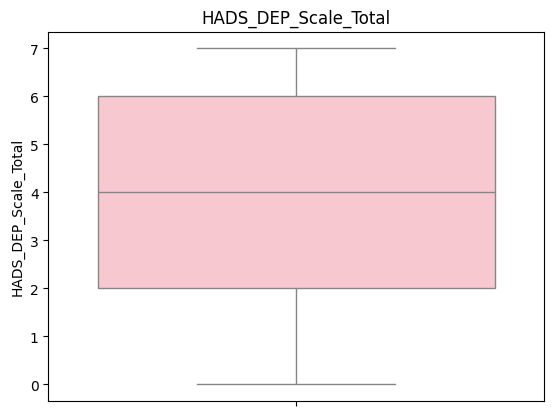

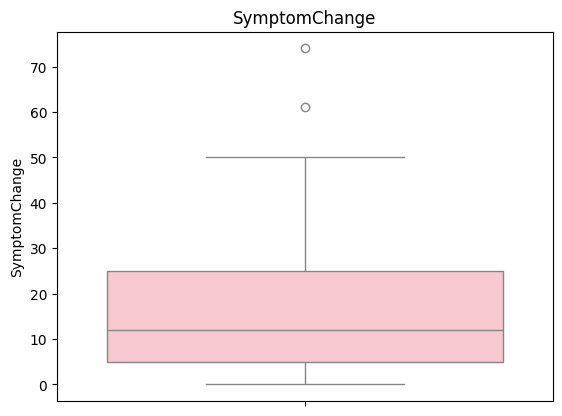

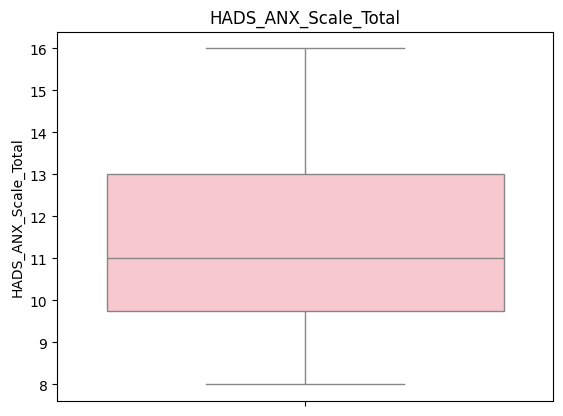

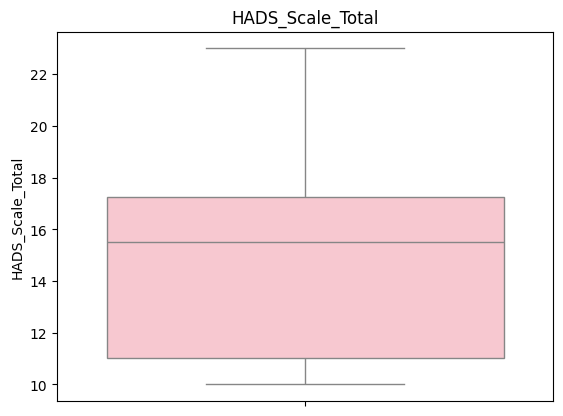

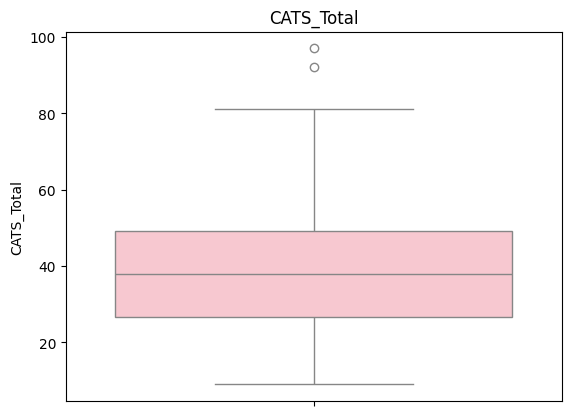

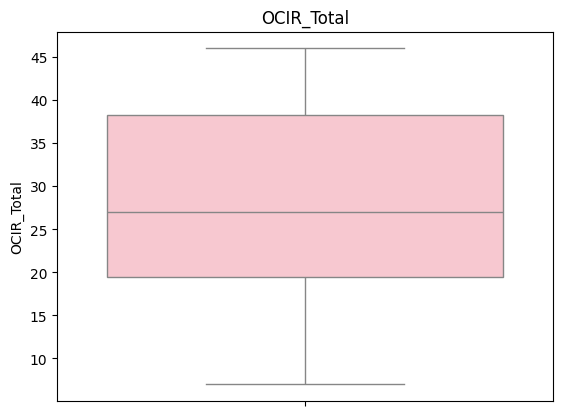

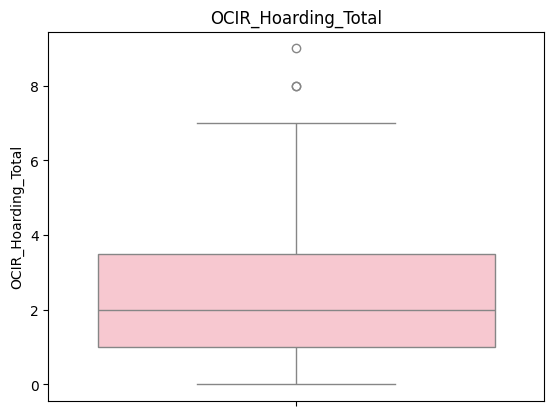

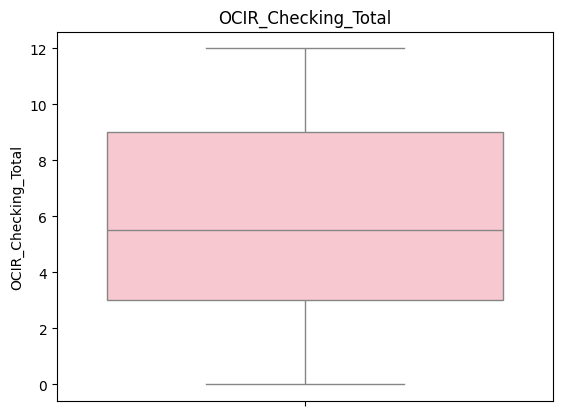

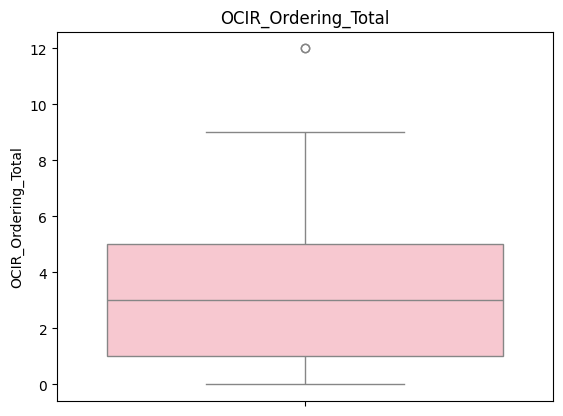

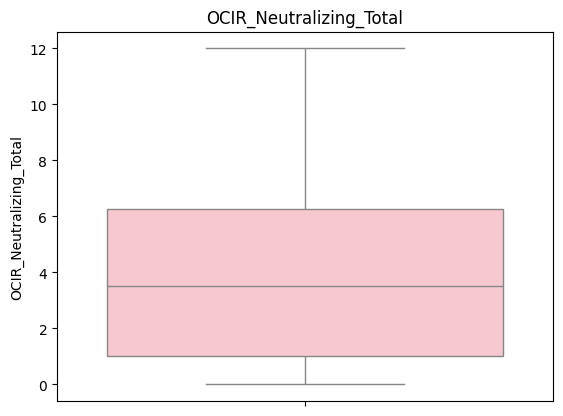

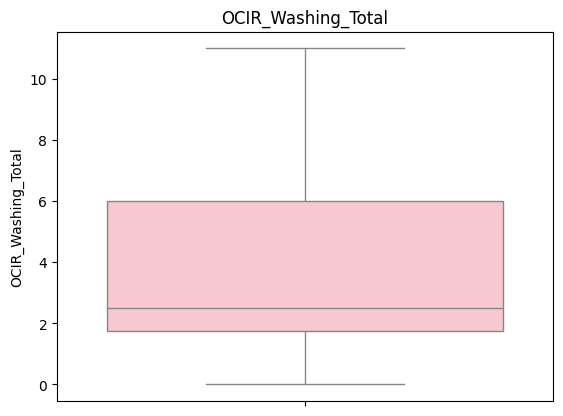

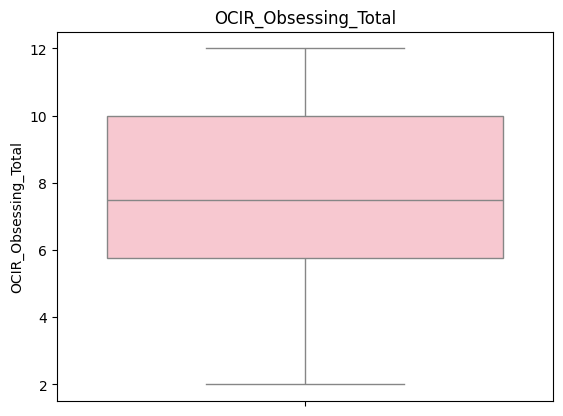

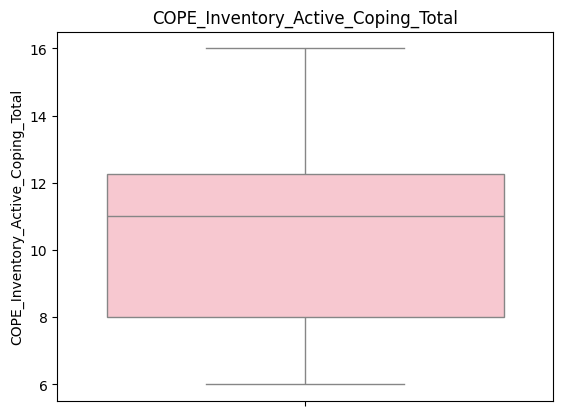

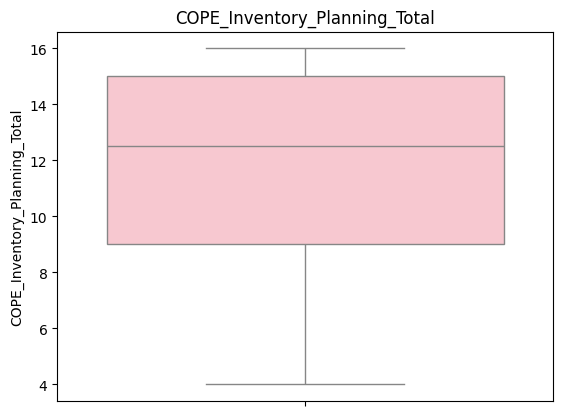

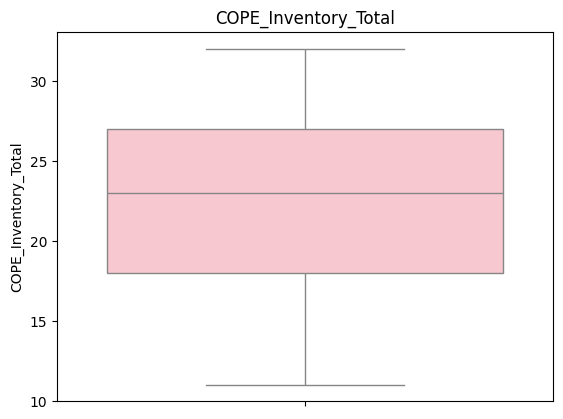

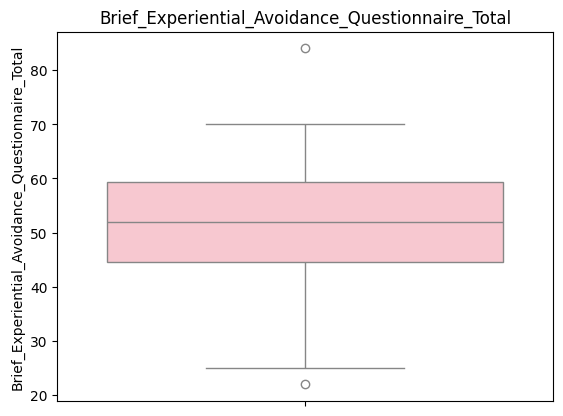

In [109]:
for col in numeric_cols:
    sns.boxplot(anx_present_dep_absent[col], color="pink")
    plt.title(col)
    plt.ylabel(col)
    plt.show()

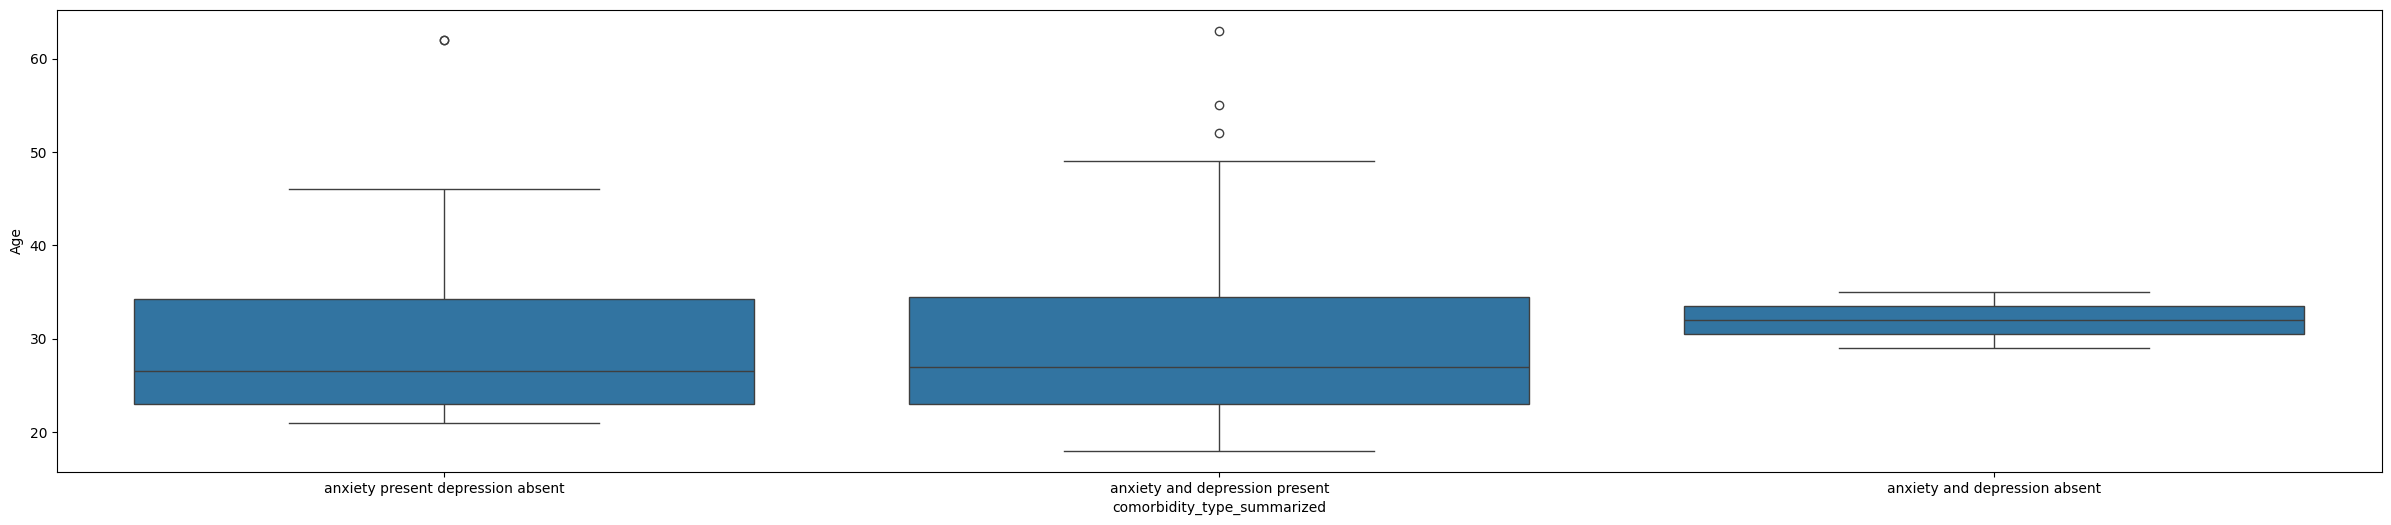

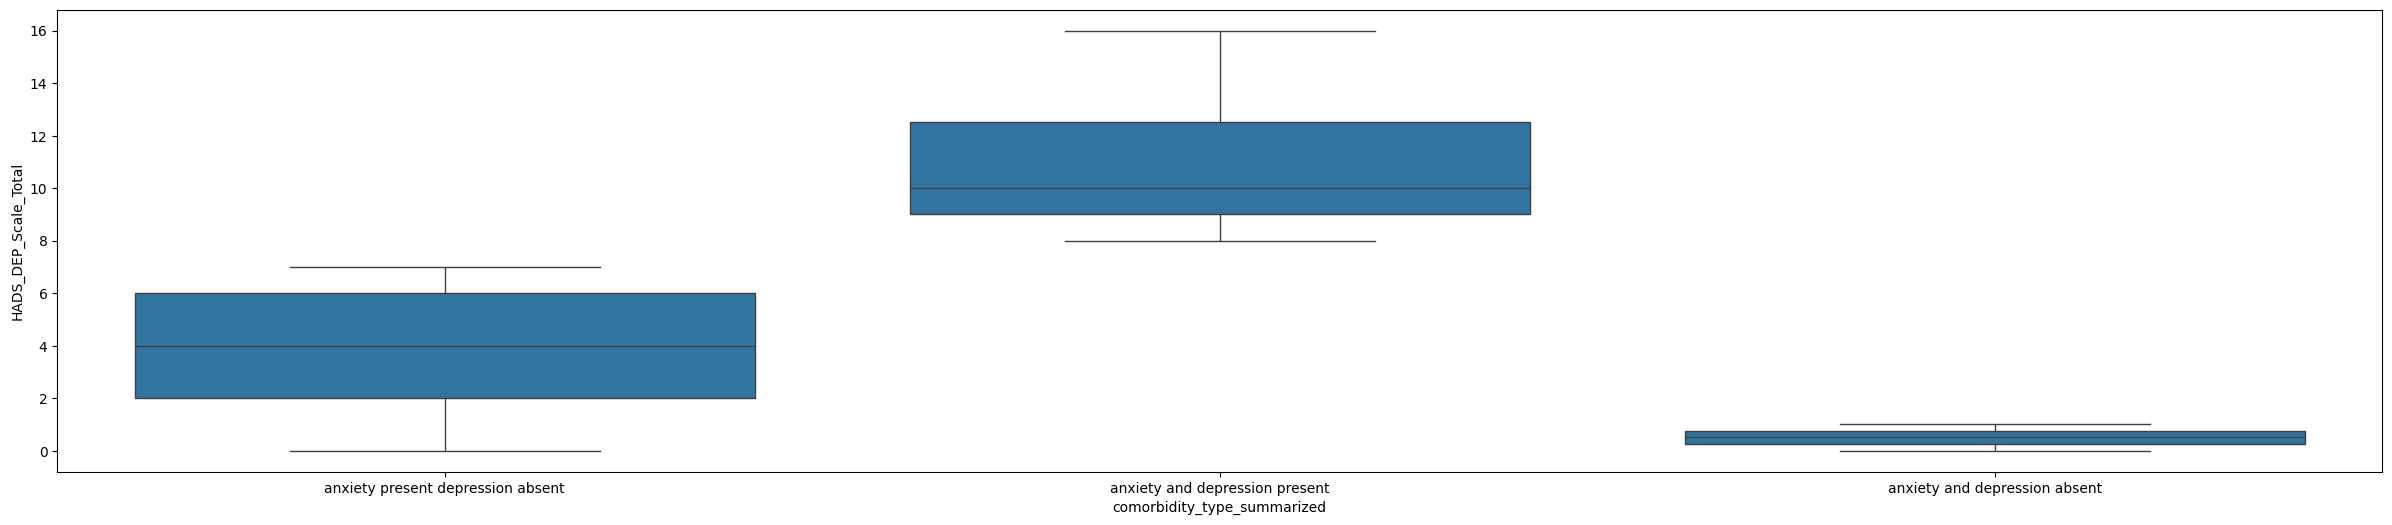

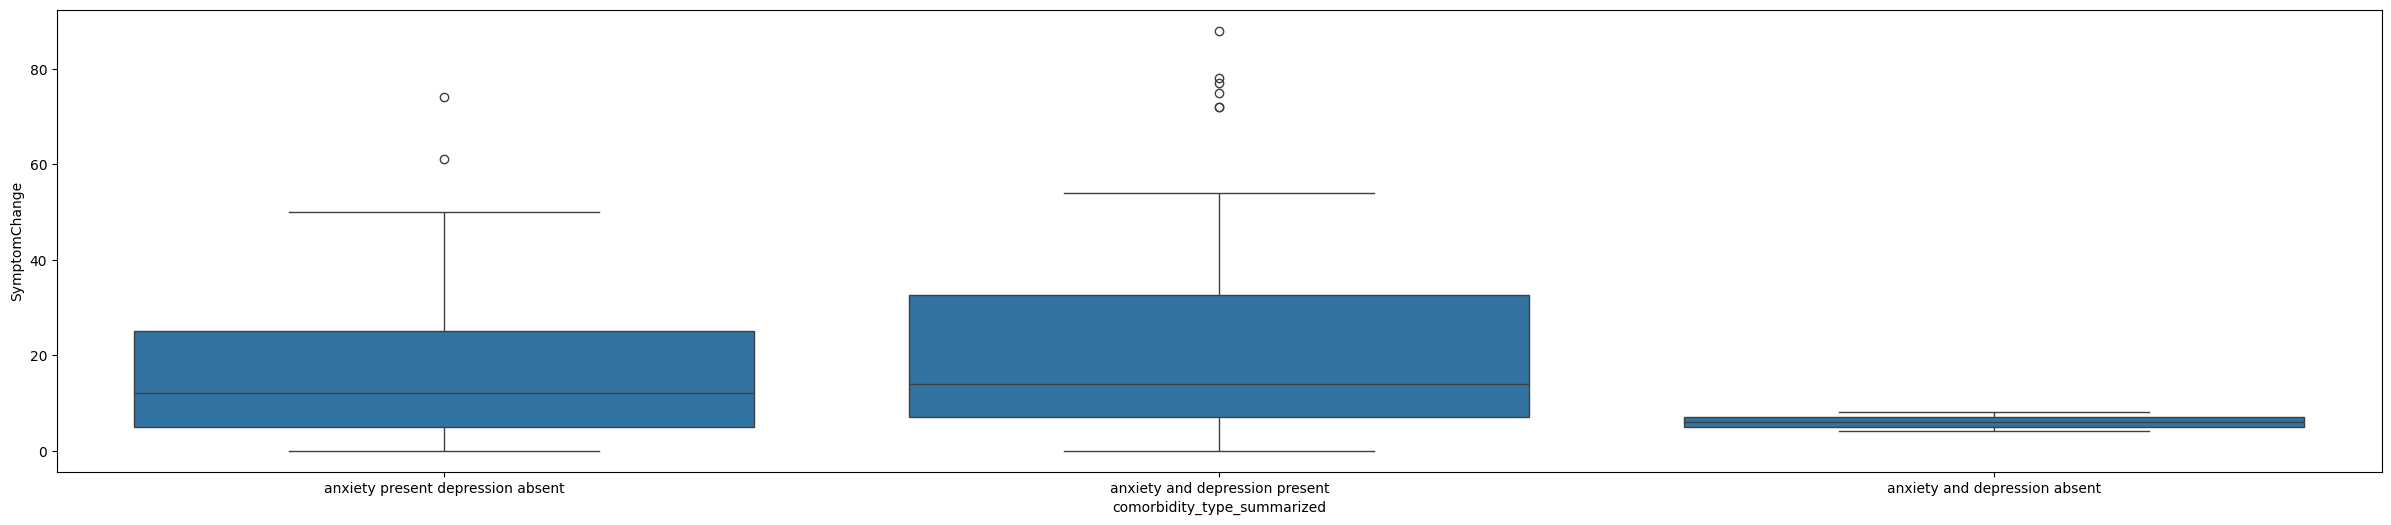

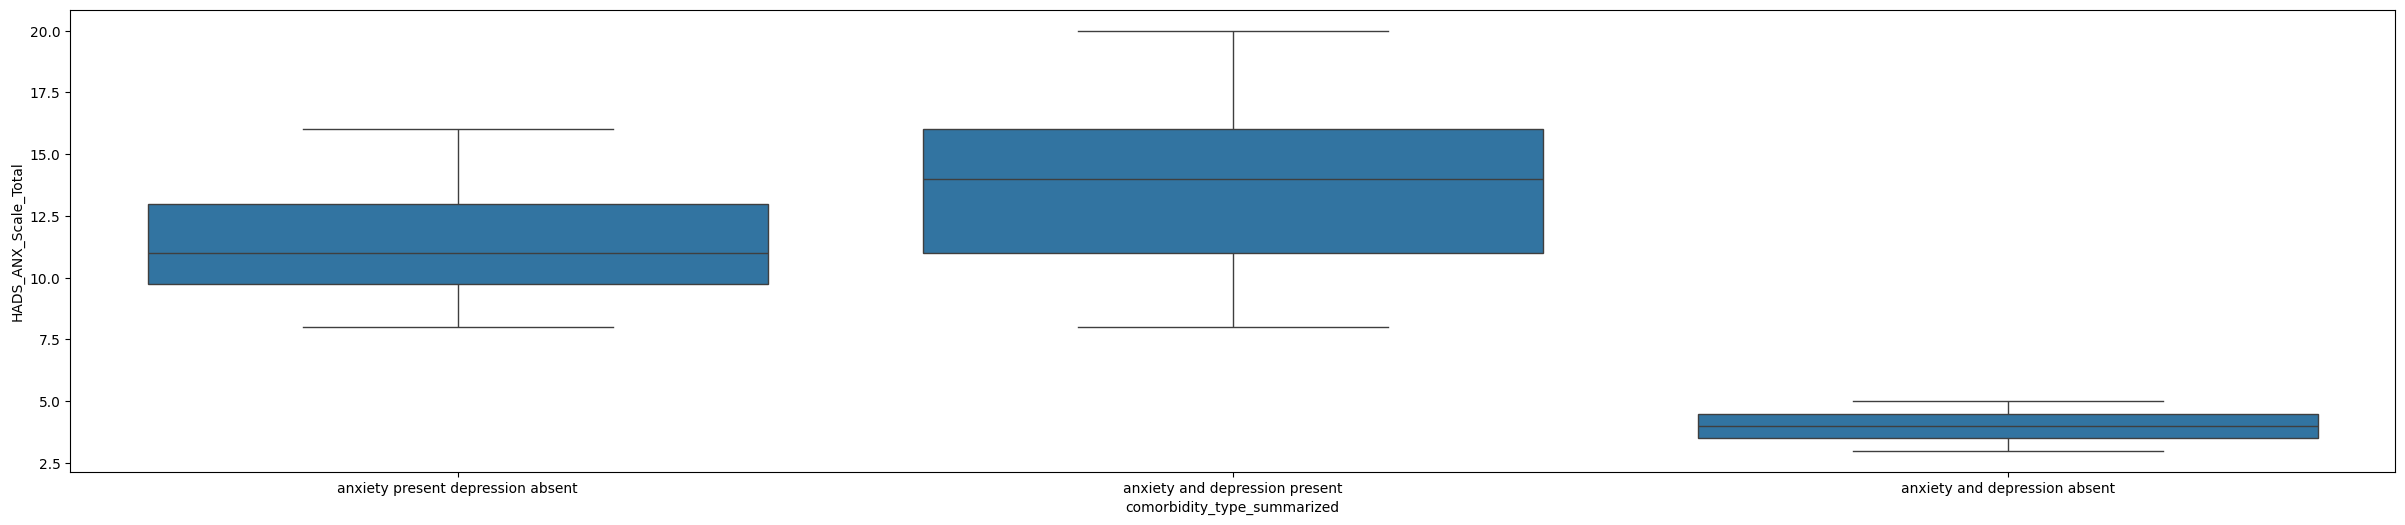

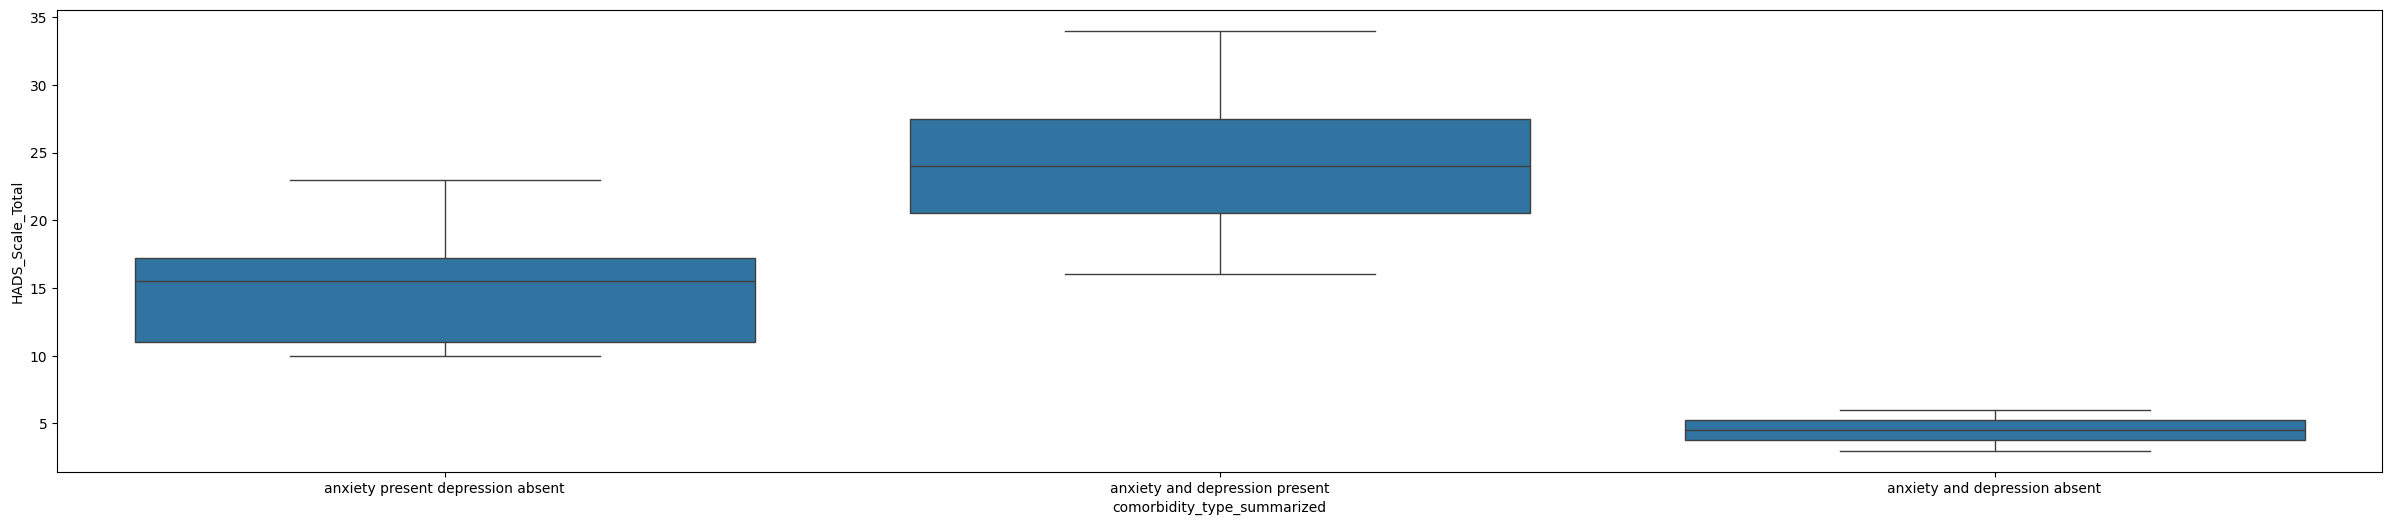

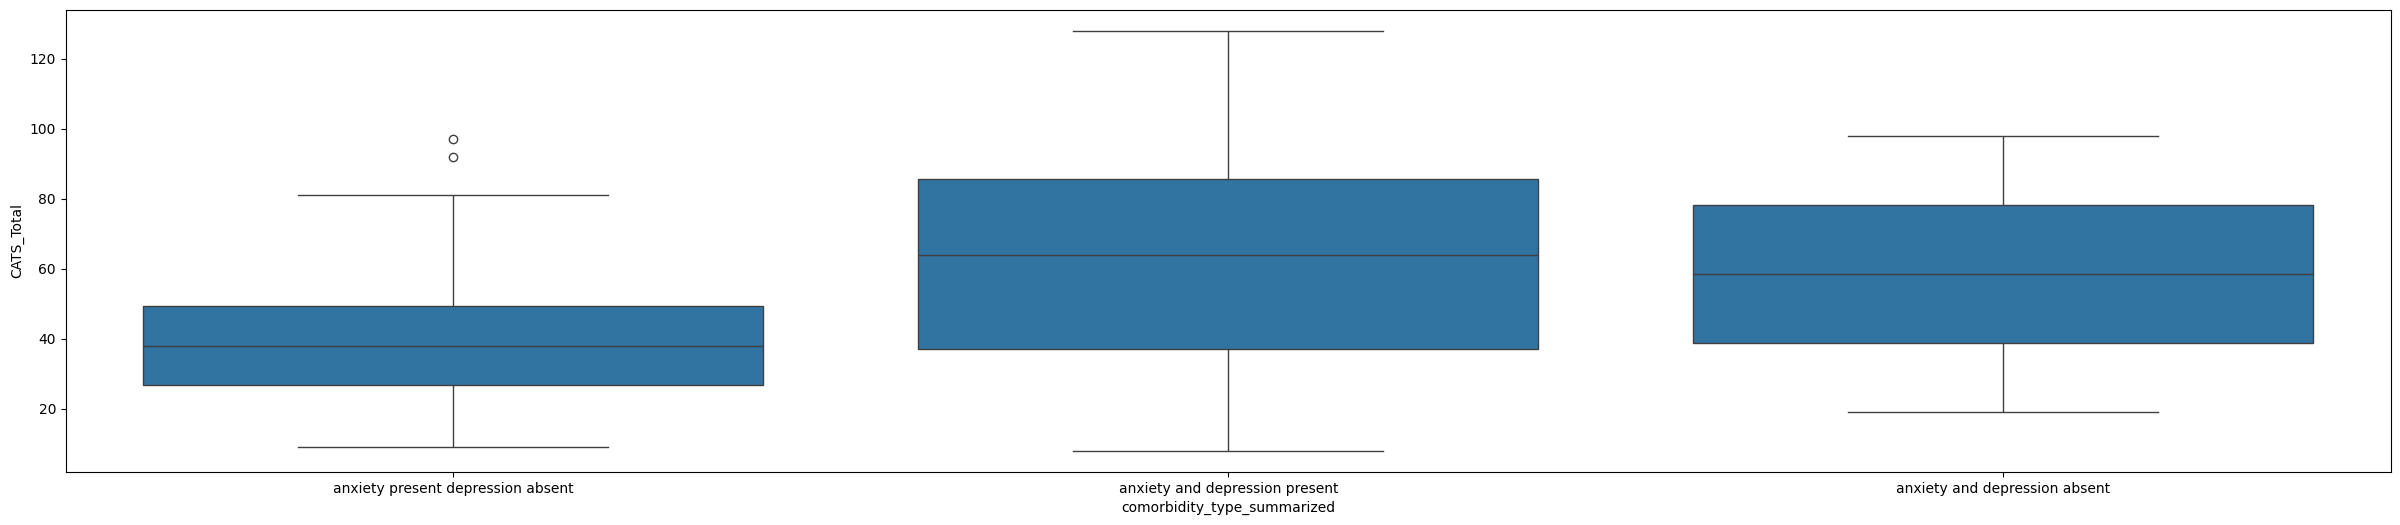

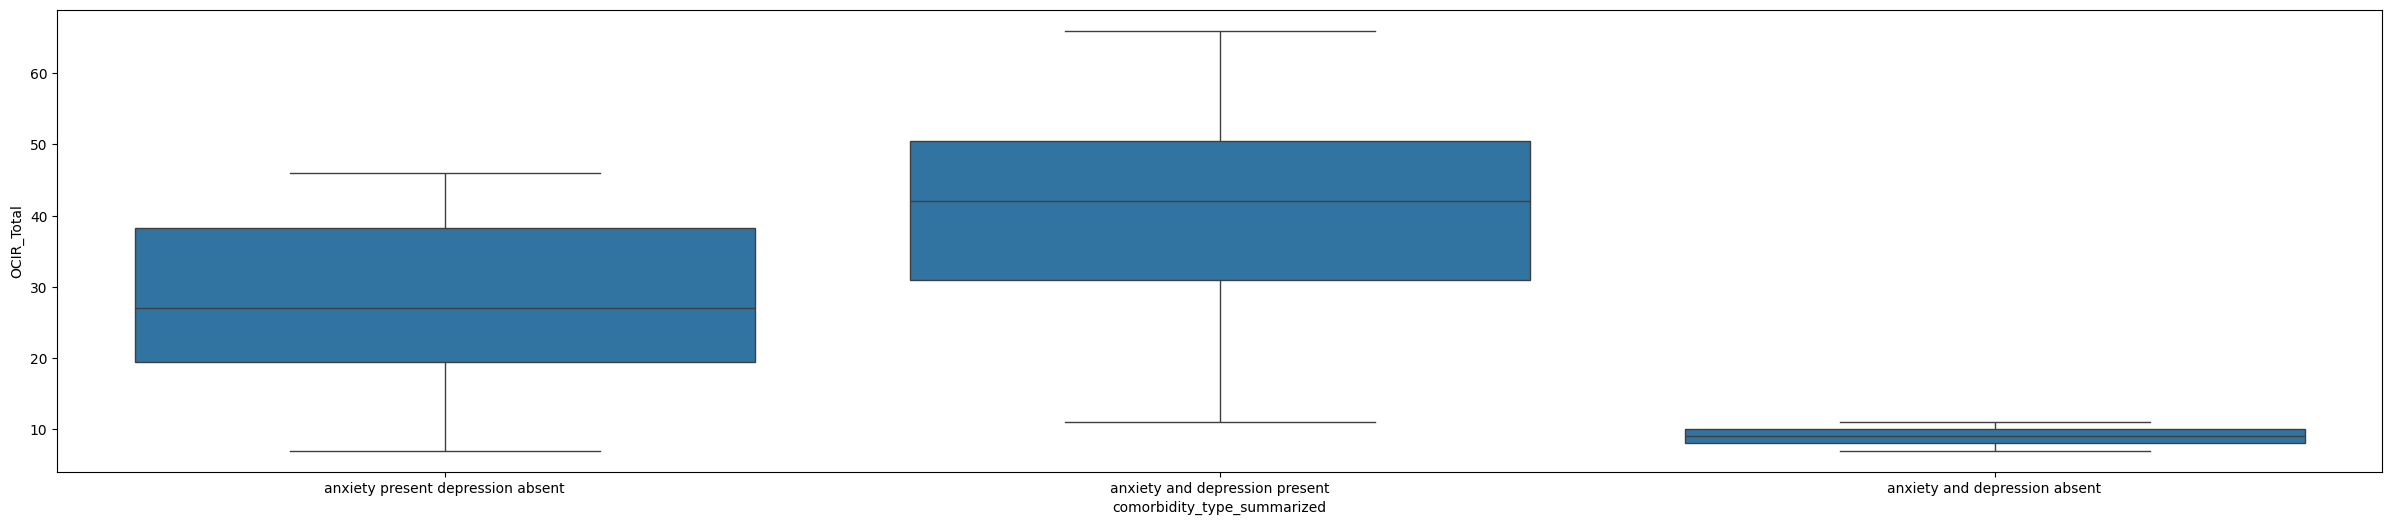

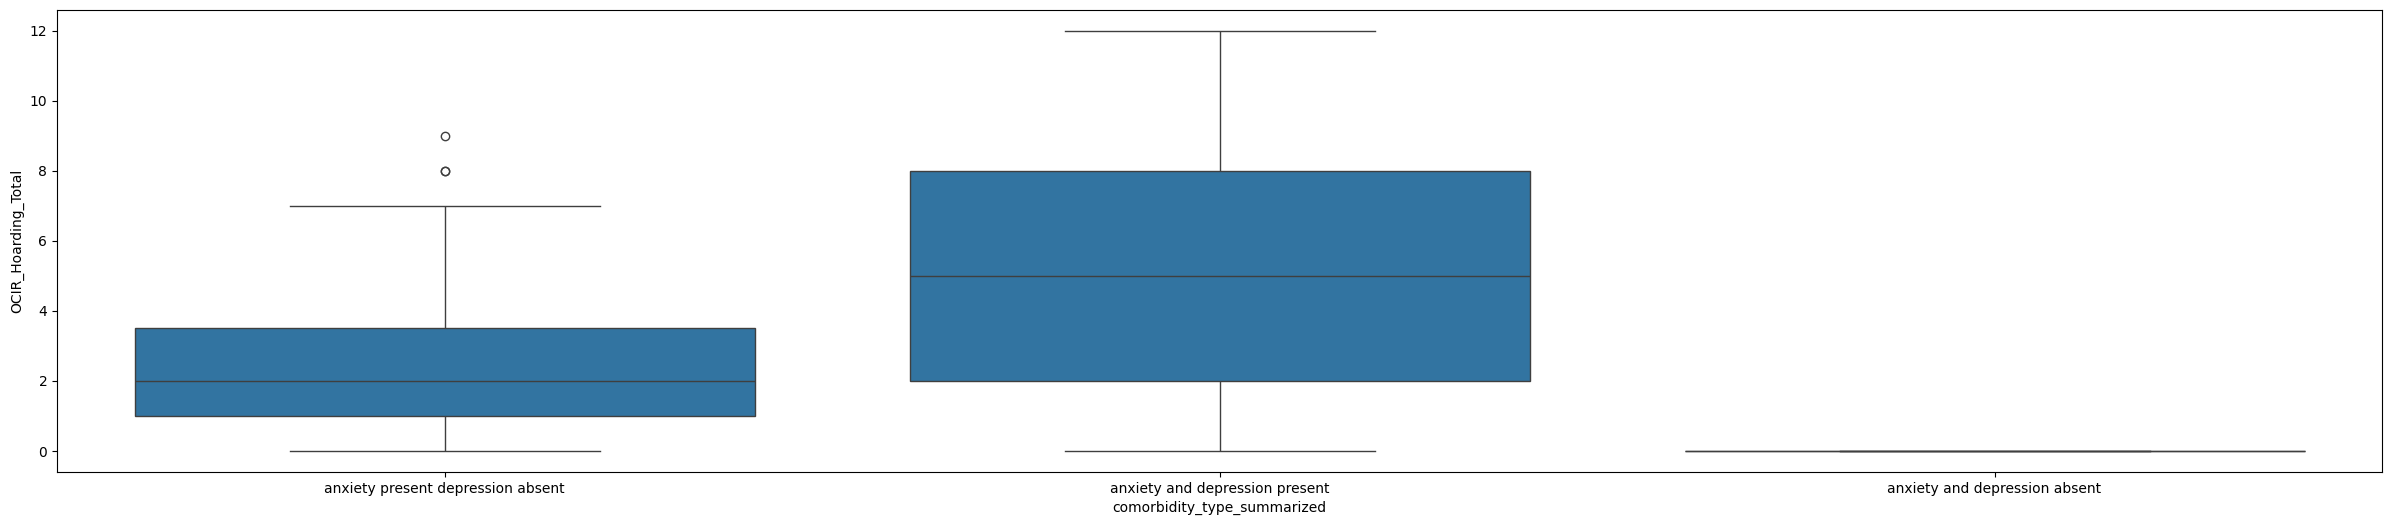

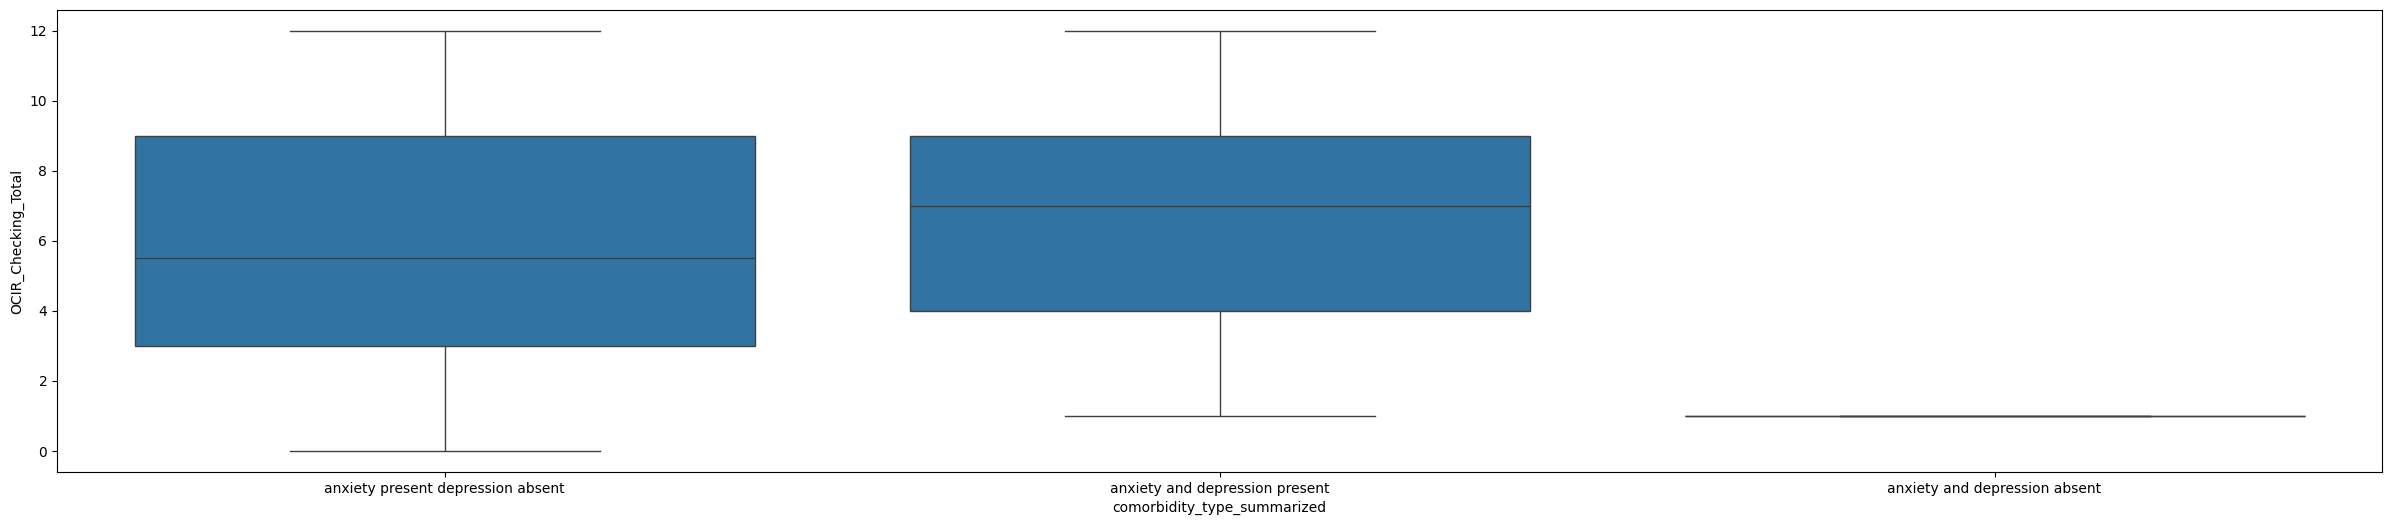

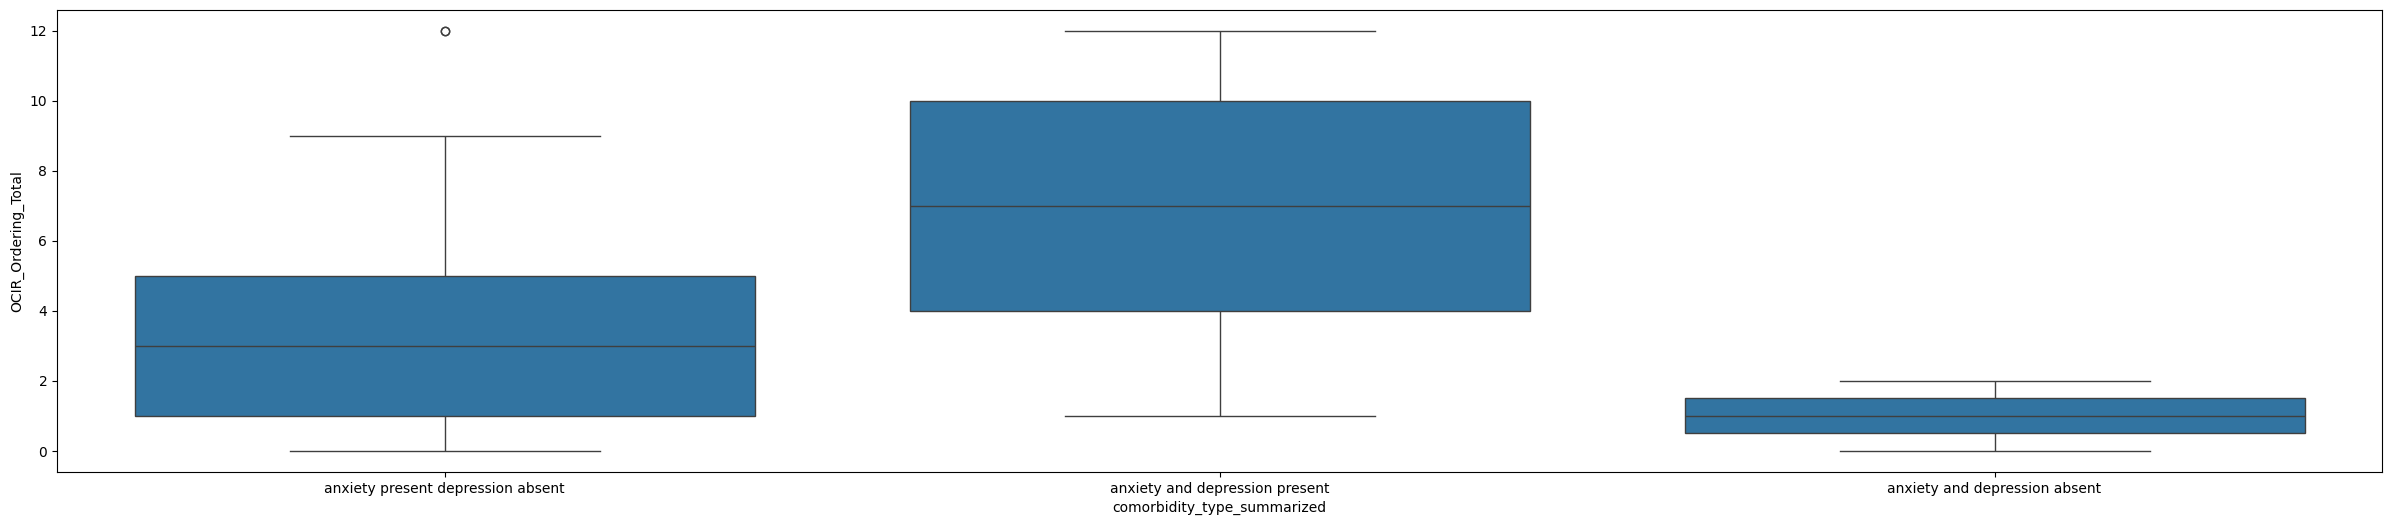

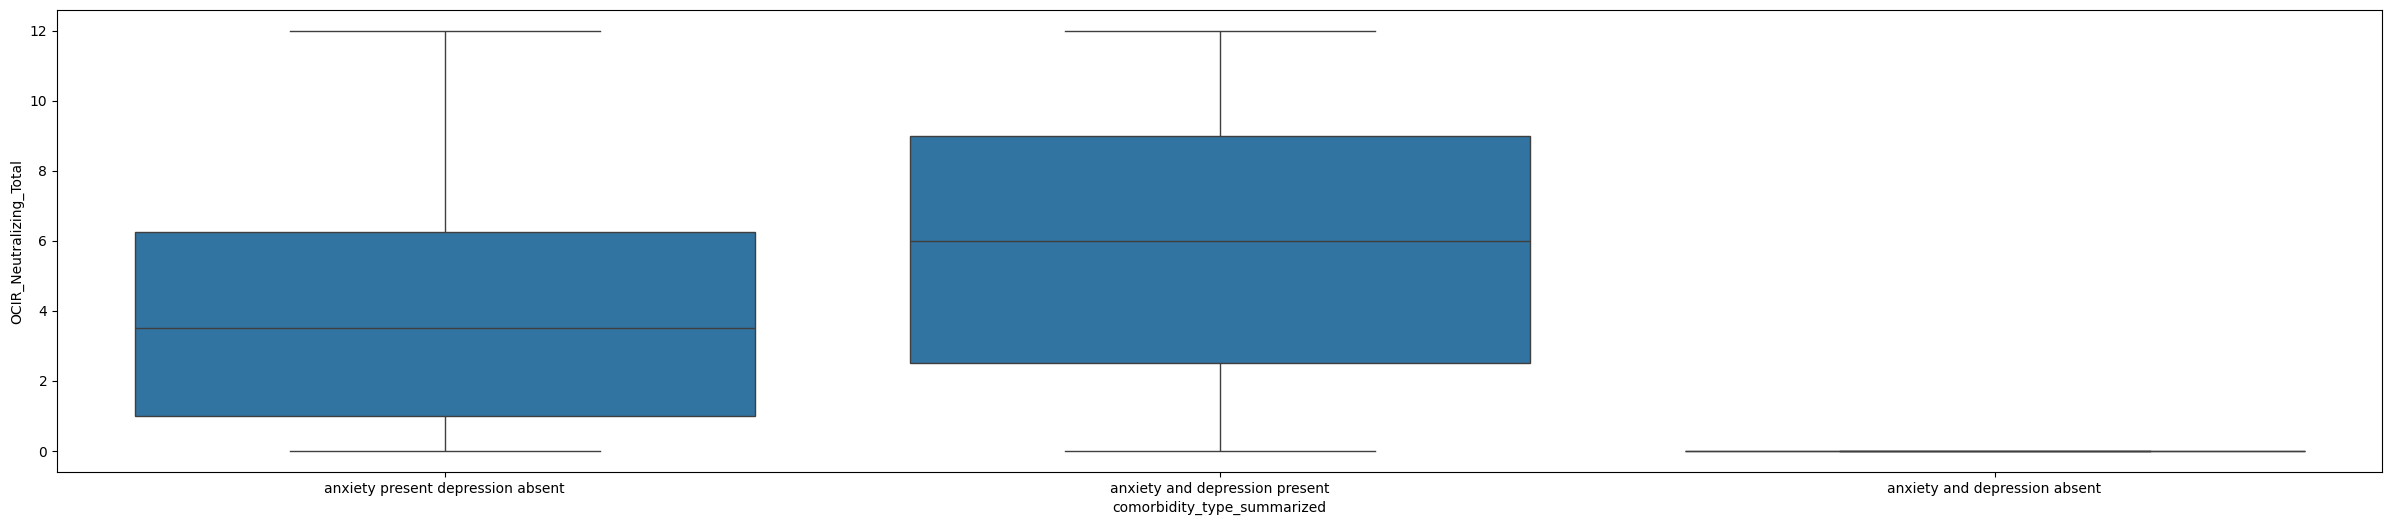

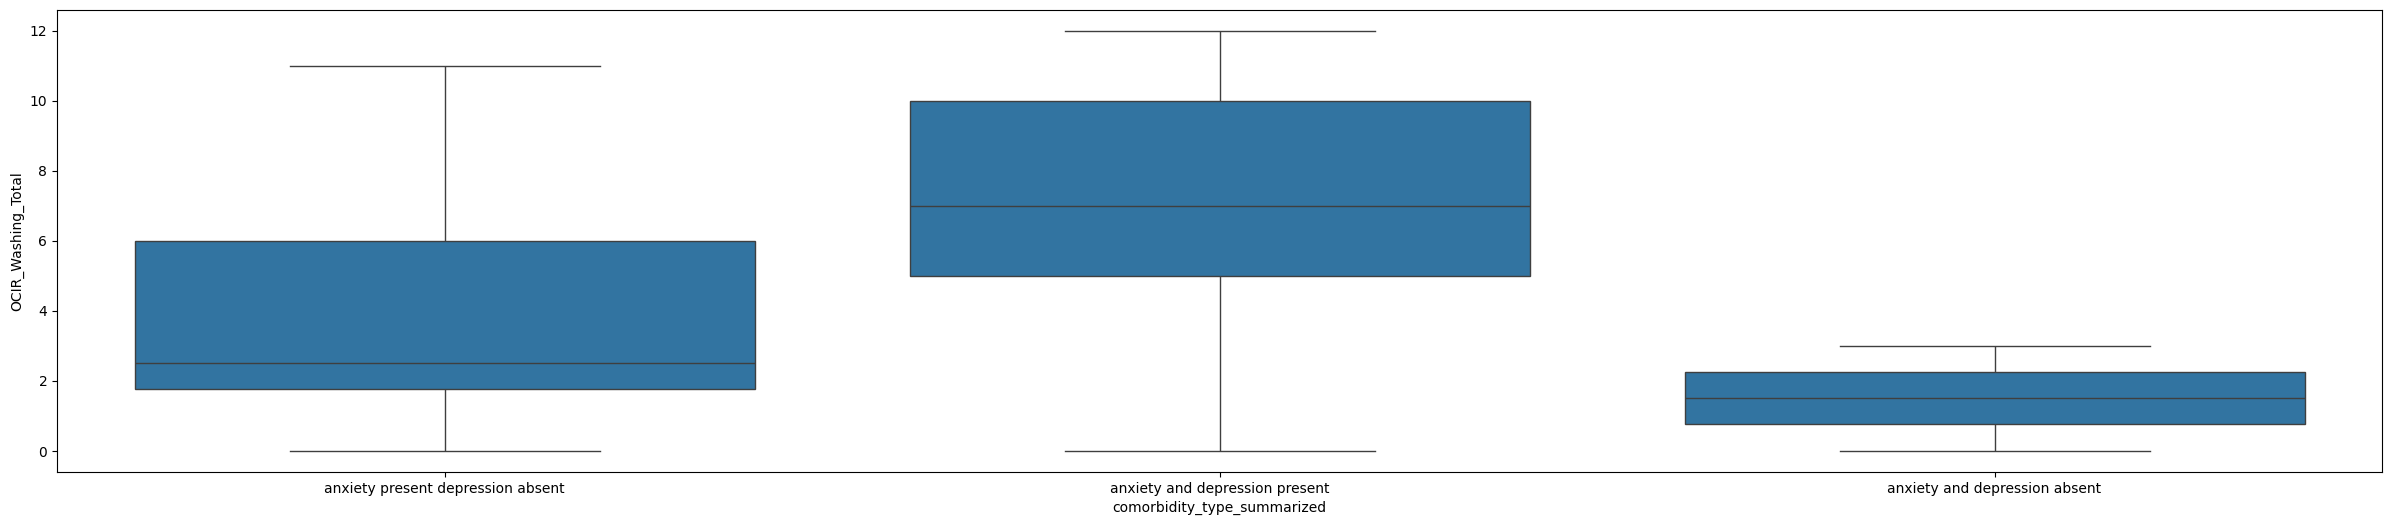

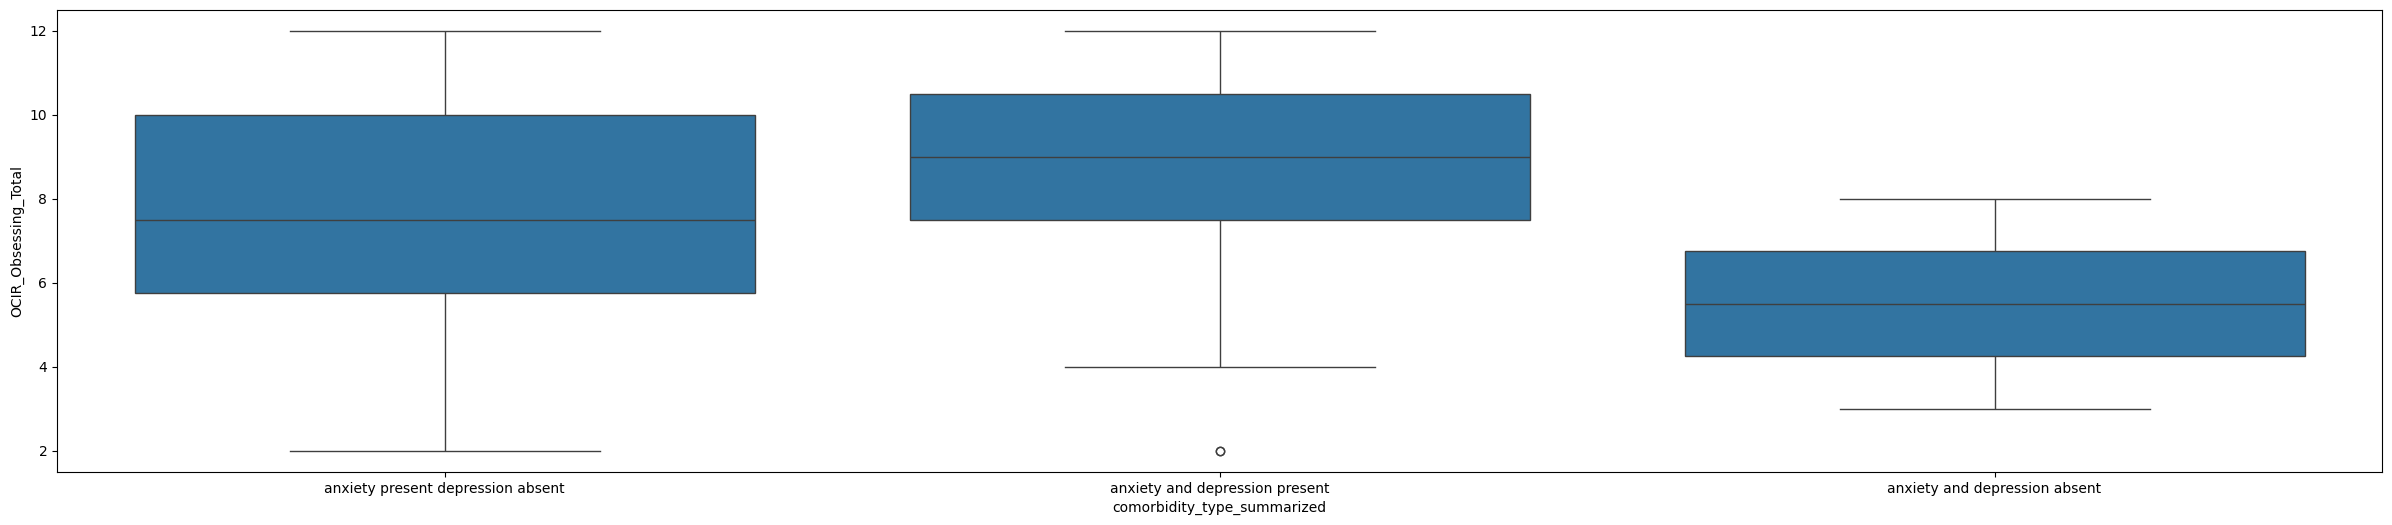

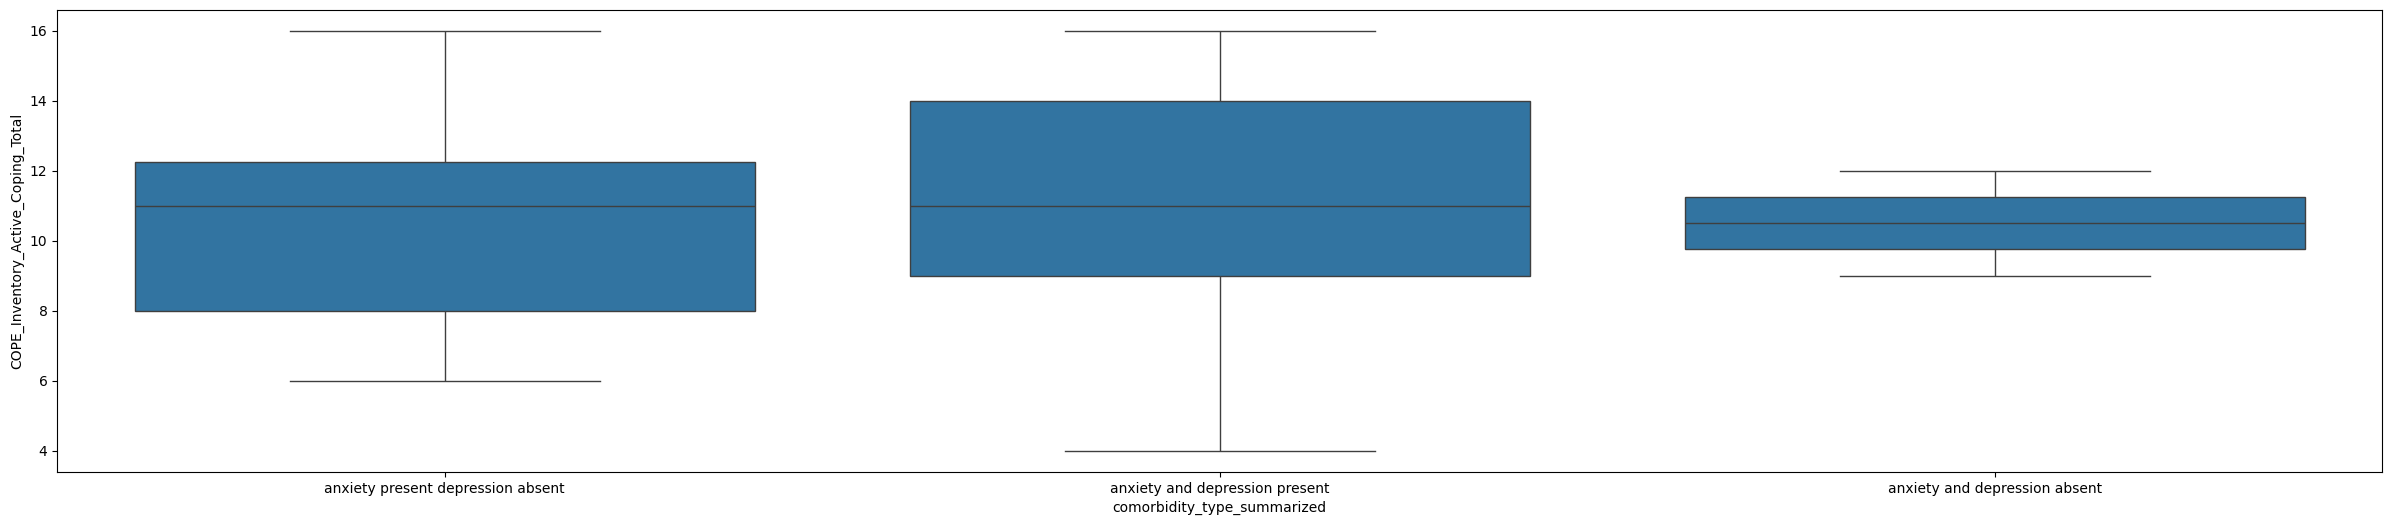

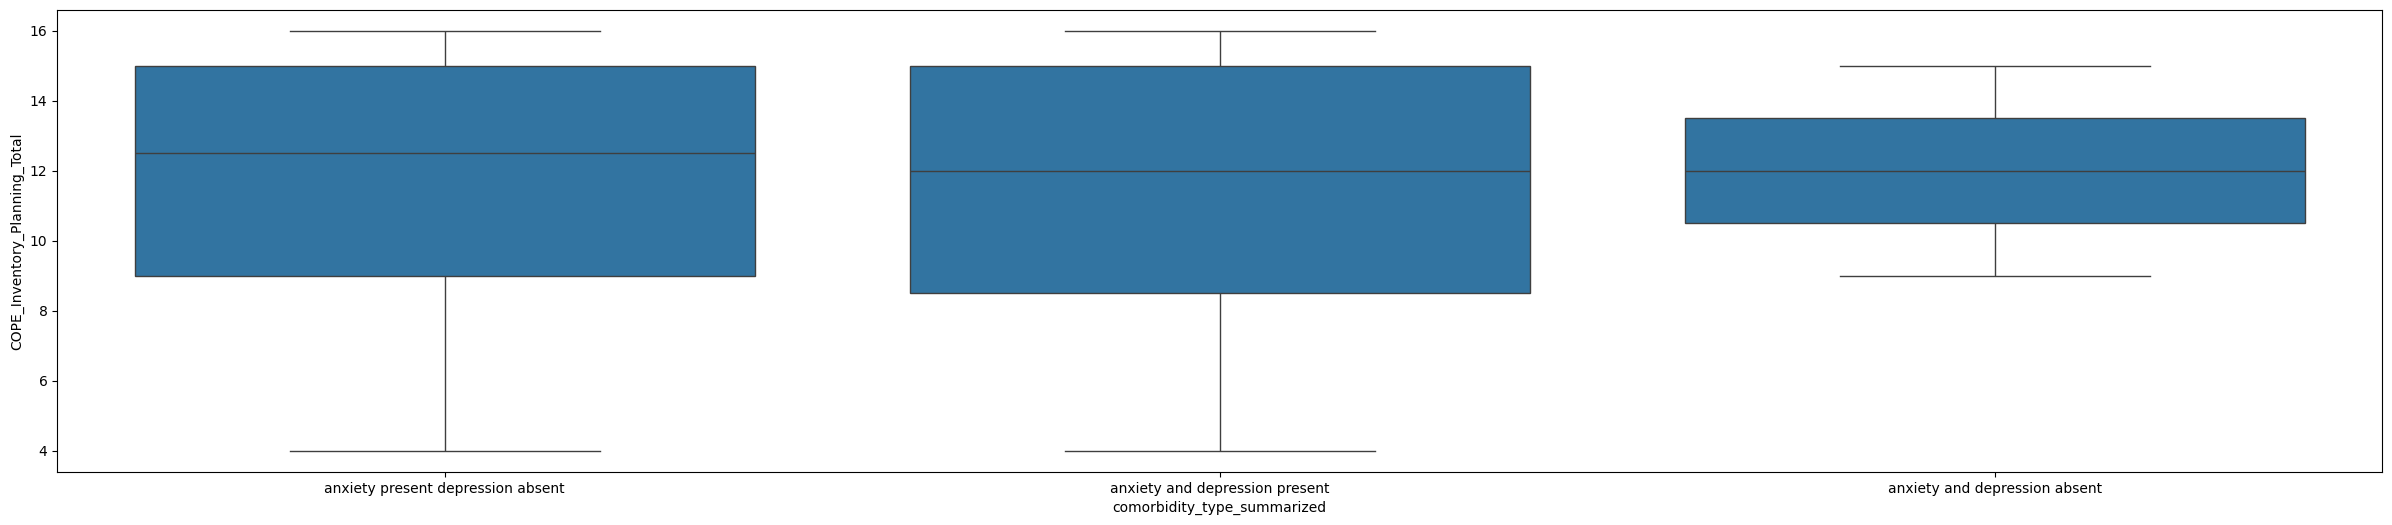

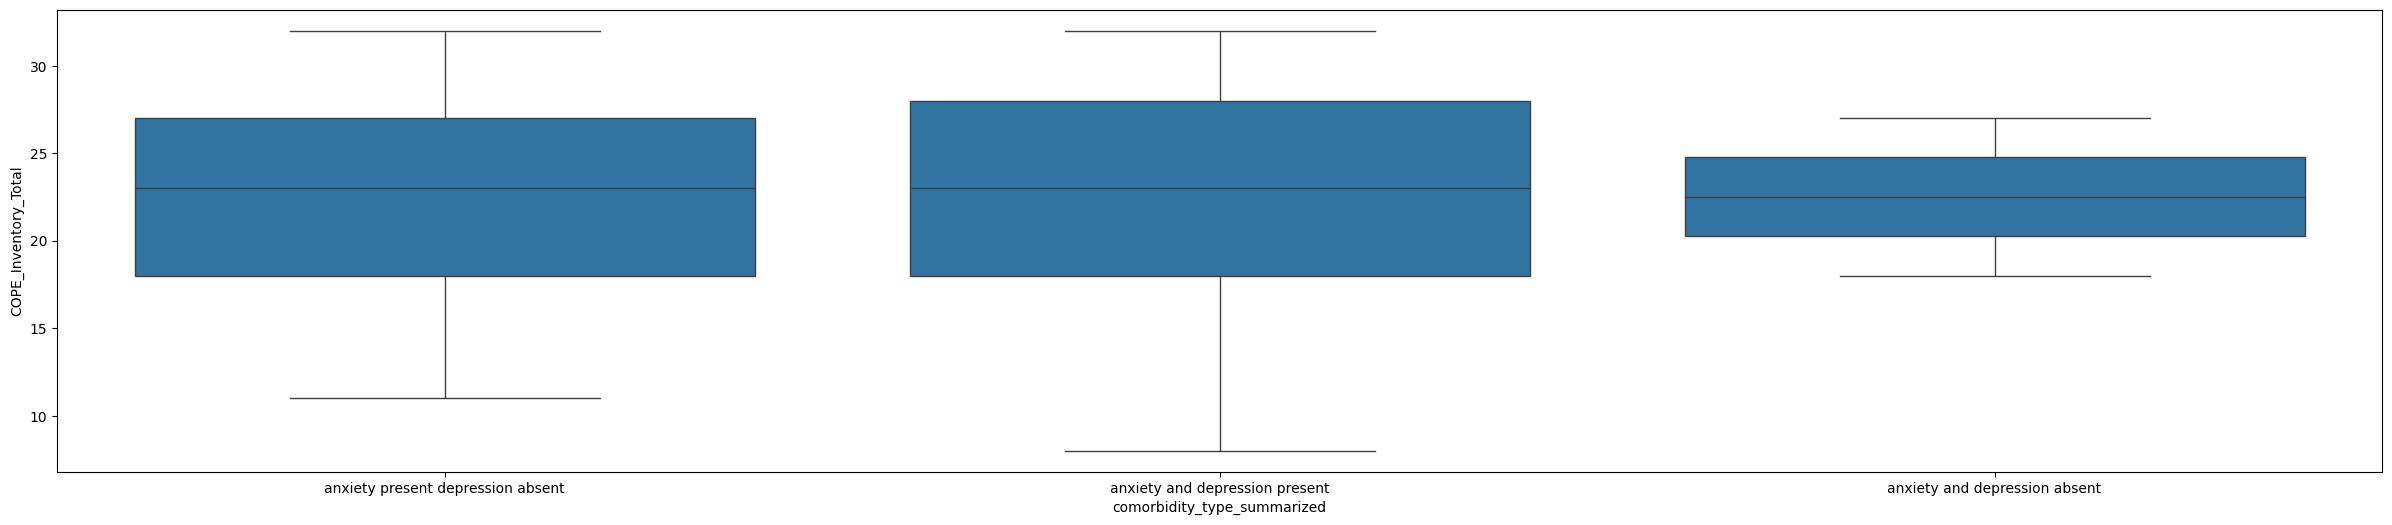

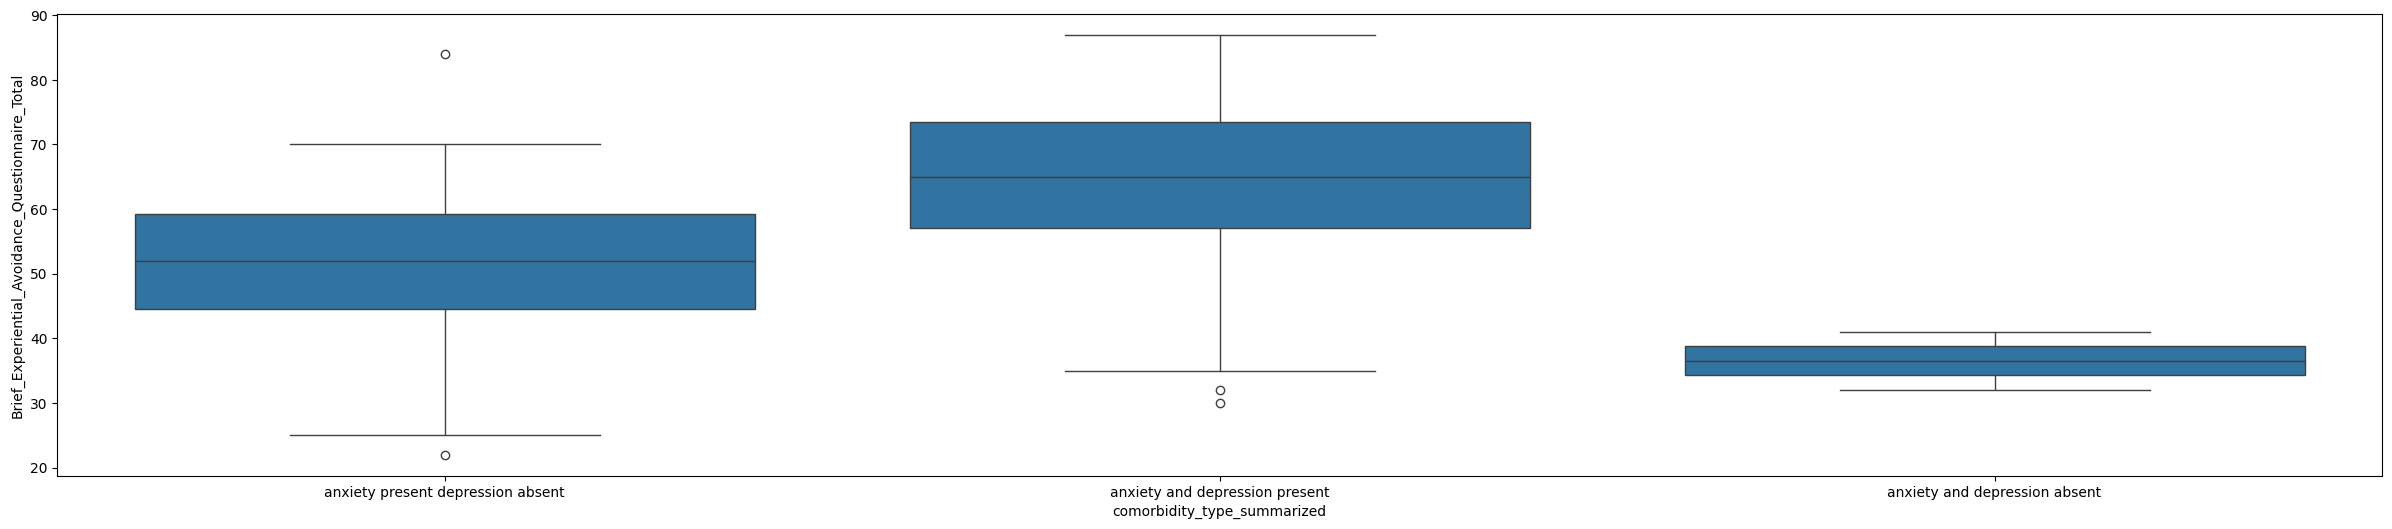

In [110]:
for col in numeric_cols:
    plt.figure(figsize=(30, 6))
    sns.boxplot(data=df, x="comorbidity_type_summarized", y=col)
    plt.show()

In [111]:
# categories=[anx_and_dep_present,anx_present_dep_absent]
cols_one = ["OCIR_Total", "CATS_Total"]

1. OCIR_Total
We can see that generally, individuals showing symptoms of both anxiety and depression reached higher OCIR  total scores than individuals showing anxiety symptoms only
* anxiety and depression present:
    
    50% showing scores above 42

    With patients reaching scores some above 60
* anxiety present, depression absent:
    
    50% showing scores above 27

    *With 0 patients reaching scores above 46*
    
outliers were not present

2. CATS_Total:
similarly to OCIR, we can also see that people with both anxiety and depression symptoms reached higher scores on the CATS scale (that some scores were never reached by people with anxiety symptoms only)
* anxiety and depression present:
    
    50% showing scores above 64

    With patients reaching scores above 120
* anxiety present, depression absent:
    
    50% showing scores above 38

    *With 0 patients reaching scores above 97* (_with two outliers being considered here_)

3. Active Coping strategy measure:
* anxiety and depression present:

* anxiety present, depression absent:
    
    never reached scores as low as 4 (minimum is 6)

outliers were not present

In [112]:
anx_present_dep_absent["COPE_Inventory_Active_Coping_Total"].min()

np.float64(6.0)

In [113]:
anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].max()

np.float64(84.0)

In [114]:
anx_and_dep_present["COPE_Inventory_Active_Coping_Total"].min()

np.float64(4.0)

In [115]:
anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].max()

np.float64(87.0)

4. Planing Coping strategy measure:
* anxiety and depression present

* anxiety present, depression absent

they both showed almost similar distribution

outliers were not present


5. Experiential avoidance scale:

*not considering outliers* individuals with anxiety only did not reach scores that are greater than 70 while some people with both anxiety and depression symptoms did, and people with both never scored below around 35 while some of the individuals with anxiety symptoms only scored below that

* anxiety and depression present
75% of individuals' scores lie below 73.5 (outliers were present)

* anxiety present, depression absent
75% of the individuals' scores lie below 59.25(outliers were present) 


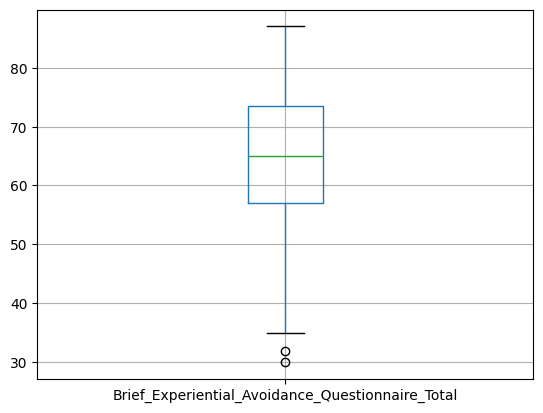

In [116]:
boxplot_data = anx_and_dep_present.boxplot(
    column="Brief_Experiential_Avoidance_Questionnaire_Total", return_type="dict"
)

In [117]:
whiskers = boxplot_data["whiskers"]

In [118]:
whisker_values = [whisker.get_ydata() for whisker in whiskers]

In [119]:
print("Whisker values for 'Brief_Experiential_Avoidance:")
print(whisker_values)

Whisker values for 'Brief_Experiential_Avoidance:
[array([57., 35.]), array([73.5, 87. ])]


In [120]:
anx_present_dep_absent["OCIR_Total"].max()

np.float64(46.0)

In [121]:
anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].min()

np.float64(22.0)

In [122]:
anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].min()

np.float64(30.0)

In [123]:
anx_present_dep_absent["CATS_Total"].max()

np.float64(97.0)

In [124]:
print(
    "EA",
    "25th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.25
    ),
)
print(
    "EA",
    "50th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.50
    ),
)
print(
    "EA",
    "75th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.75
    ),
)

EA 25th percentile anxiety and depression category 57.0
EA 50th percentile anxiety and depression category 65.0
EA 75th percentile anxiety and depression category 73.5


In [125]:
print(
    "EA",
    "25th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.25
    ),
)
print(
    "EA",
    "50th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.50
    ),
)
print(
    "EA",
    "75th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.75
    ),
)

EA 25th percentile anxiety present depression absent category 44.5
EA 50th percentile anxiety present depression absent category 52.0
EA 75th percentile anxiety present depression absent category 59.25


In [126]:
for n in cols_one:
    print(
        n,
        "25th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.25),
    )
    print(
        n,
        "50th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.50),
    )
    print(
        n,
        "75th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.75),
    )

OCIR_Total 25th percentile anxiety and depression category 31.0
OCIR_Total 50th percentile anxiety and depression category 42.0
OCIR_Total 75th percentile anxiety and depression category 50.5
CATS_Total 25th percentile anxiety and depression category 37.0
CATS_Total 50th percentile anxiety and depression category 64.0
CATS_Total 75th percentile anxiety and depression category 85.5


In [127]:
for n in cols_one:
    print(
        n,
        "25th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.25),
    )
    print(
        n,
        "50th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.50),
    )
    print(
        n,
        "75th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.75),
    )

OCIR_Total 25th percentile anxiety present depression absent category 19.5
OCIR_Total 50th percentile anxiety present depression absent category 27.0
OCIR_Total 75th percentile anxiety present depression absent category 38.25
CATS_Total 25th percentile anxiety present depression absent category 26.75
CATS_Total 50th percentile anxiety present depression absent category 38.0
CATS_Total 75th percentile anxiety present depression absent category 49.25


In [128]:
df["CATS_Total"].corr(df["HADS_DEP_Scale_Total"])

np.float64(0.3877949380583659)